# Telecom Customer Churn Prediction

# Library Importation

In [1]:
!pip install folium

In [2]:
!pip install imbalanced-learn

In [3]:
#Making necessary imports
import numpy as np  # linear algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import folium
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from itertools import cycle
from sklearn.tree import plot_tree
from scipy.stats import randint
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
import warnings
from sklearn.exceptions import ConvergenceWarning

# Data Importation

In [4]:
# Loading in the Dataset
Churn =pd.read_csv("Churn.csv")

# Initial Data Analysis

In [5]:
#Checking head of dataset (first 10)
Churn.head(n=10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   
5     95345  37.581496 -119.972762                    0  ...      Credit Card   
6     93437  34.757477 -120.550507                    1  ...  Bank Withdrawal   
7     94558  38.489789 -122.270110                    8  ...      Credit Card   
8     93063  34.296813 -118.685703                    0  ...  Bank Withdrawal   
9     95681  38.984756 -121.345074                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0          65.60        593.30           0.00                        0   
1          -4.00        542.40          38.33                       10   
2          73.90        280.85           0.00                        0   
3          98.00       1237.85           0.00                        0   
4          83.90        267.40           0.00                        0   
5          69.40        571.45           0.00                        0   
6         109.70       7904.25           0.00                        0   
7          84.65       5377.80           0.00                       20   
8          48.20        340.35           0.00                        0   
9          90.45       5957.90           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   
5                      150.93        722.38           Stayed              NaN   
6                      707.16       8611.41           Stayed              NaN   
7                      816.48       6214.28           Stayed              NaN   
8                       73.71        414.06           Stayed              NaN   
9                     1849.90       7807.80           Stayed              NaN   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN  

[10 rows x 38 columns]

In [6]:
# Checking size of dataset
Churn.shape

(7043, 38)

In [7]:
# Checking summary statistics of numerical features
Churn.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [8]:
#Checking data types of each features and the number of non-null values.
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [9]:
# Checking data types
Churn.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

## Removing Joined from Target Variables


The joined observation would be removed from the target variable because the aim of the analysis is to predict telecom customer churn & not whether new customer joined. To predict the customer churn we would be using the "Stayed" or "churned".

In [11]:
Churn = Churn[Churn['Customer Status'] != 'Joined']

In [12]:
print(Churn['Customer Status'])

0        Stayed
1        Stayed
2       Churned
3       Churned
4       Churned
         ...   
7037    Churned
7038     Stayed
7039    Churned
7041     Stayed
7042     Stayed
Name: Customer Status, Length: 6589, dtype: object


In [14]:
# Checking shape of datset after removing joined
Churn.shape

(6589, 38)

In [15]:
#Checking tail of dataset (last 10)
Churn.tail(n=10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
7031  9974-JFBHQ    Male   31      No                     1       Del Rey   
7032  9975-GPKZU    Male   62     Yes                     3       Alameda   
7034  9978-HYCIN    Male   72     Yes                     1   Bakersfield   
7035  9979-RGMZT  Female   20      No                     0   Los Angeles   
7036  9985-MWVIX  Female   53      No                     0          Hume   
7037  9986-BONCE  Female   36      No                     0     Fallbrook   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
7031     93616  36.657462 -119.595293                    0  ...   
7032     94501  37.774633 -122.274434                    0  ...   
7034     93301  35.383937 -119.020428                    1  ...   
7035     90022  34.023810 -118.156582                    0  ...   
7036     93628  36.807595 -118.901544                    0  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
7031      Credit Card          99.15       6171.20            0.0   
7032      Credit Card          19.75        856.50            0.0   
7034  Bank Withdrawal          84.95       4018.05            0.0   
7035      Credit Card          94.05        633.45            0.0   
7036      Credit Card          70.15         70.15            0.0   
7037  Bank Withdrawal          20.95         85.50            0.0   
7038      Credit Card          55.15        742.90            0.0   
7039  Bank Withdrawal          85.10       1873.70            0.0   
7041      Credit Card          67.85       4627.65            0.0   
7042  Bank Withdrawal          59.00       3707.60            0.0   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
7031                        0                     1434.24       7605.44   
7032                        0                      352.82       1209.32   
7034                       80                     1987.63       6085.68   
7035                        0                      255.43        888.88   
7036                        0                       42.09        112.24   
7037                        0                        8.04         93.54   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
7031           Stayed              NaN                            NaN  
7032           Stayed              NaN                            NaN  
7034           Stayed              NaN                            NaN  
7035           Stayed              NaN                            NaN  
7036          Churned       Competitor  Competitor had better devices  
7037          Churned       Competitor   Competitor made better offer  
7038           Stayed              NaN                            NaN  
7039          Churned  Dissatisfaction        Product dissatisfaction  
7041           Stayed              NaN                            NaN  
7042           Stayed              NaN                            NaN  

[10 rows x 38 columns]

# Exploratory Data Analysis(EDA) / Data Visualisation 

## Univariate Analysis

### Dividing features into Categorical and Numerical for easy Visualisation

In [16]:
categorical_columns = ['Gender','Married','City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
                       'Internet Type', 'Online Security', 'Number of Dependents', 'Number of Referrals', 'Online Backup',
                       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
                       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract','Total Extra Data Charges', 'Paperless Billing', 'Payment Method', 'Churn Category', 'Churn Reason', 'Customer Status']
numerical_columns = ['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
                     'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 
                     'Total Long Distance Charges', 'Total Revenue']

In [17]:
Categorical = Churn[categorical_columns]
Numerical = Churn[numerical_columns]

In [18]:
#Checking head of datase
Categorical.head()

Gender Married          City    Offer Phone Service Multiple Lines  \
0  Female     Yes  Frazier Park      NaN           Yes             No   
1    Male      No      Glendale      NaN           Yes            Yes   
2    Male      No    Costa Mesa  Offer E           Yes             No   
3    Male     Yes      Martinez  Offer D           Yes             No   
4  Female     Yes     Camarillo      NaN           Yes             No   

  Internet Service Internet Type Online Security  Number of Dependents  ...  \
0              Yes         Cable              No                     0  ...   
1              Yes         Cable              No                     0  ...   
2              Yes   Fiber Optic              No                     0  ...   
3              Yes   Fiber Optic              No                     0  ...   
4              Yes   Fiber Optic              No                     0  ...   

   Streaming Movies Streaming Music Unlimited Data        Contract  \
0                No              No            Yes        One Year   
1               Yes             Yes             No  Month-to-Month   
2                No              No            Yes  Month-to-Month   
3               Yes              No            Yes  Month-to-Month   
4                No              No            Yes  Month-to-Month   

  Total Extra Data Charges Paperless Billing   Payment Method  \
0                        0               Yes      Credit Card   
1                       10                No      Credit Card   
2                        0               Yes  Bank Withdrawal   
3                        0               Yes  Bank Withdrawal   
4                        0               Yes      Credit Card   

    Churn Category                   Churn Reason  Customer Status  
0              NaN                            NaN           Stayed  
1              NaN                            NaN           Stayed  
2       Competitor  Competitor had better devices          Churned  
3  Dissatisfaction        Product dissatisfaction          Churned  
4  Dissatisfaction            Network reliability          Churned  

[5 rows x 25 columns]

In [19]:
#Checking head of dataset 
Numerical.head()

Age  Tenure in Months  Avg Monthly Long Distance Charges  \
0   37                 9                              42.39   
1   46                 9                              10.69   
2   50                 4                              33.65   
3   78                13                              27.82   
4   75                 3                               7.38   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                     16.0            65.6         593.30           0.00   
1                     10.0            -4.0         542.40          38.33   
2                     30.0            73.9         280.85           0.00   
3                      4.0            98.0        1237.85           0.00   
4                     11.0            83.9         267.40           0.00   

   Total Long Distance Charges  Total Revenue  
0                       381.51         974.81  
1                        96.21         610.28  
2                       134.60         415.45  
3                       361.66        1599.51  
4                        22.14         289.54

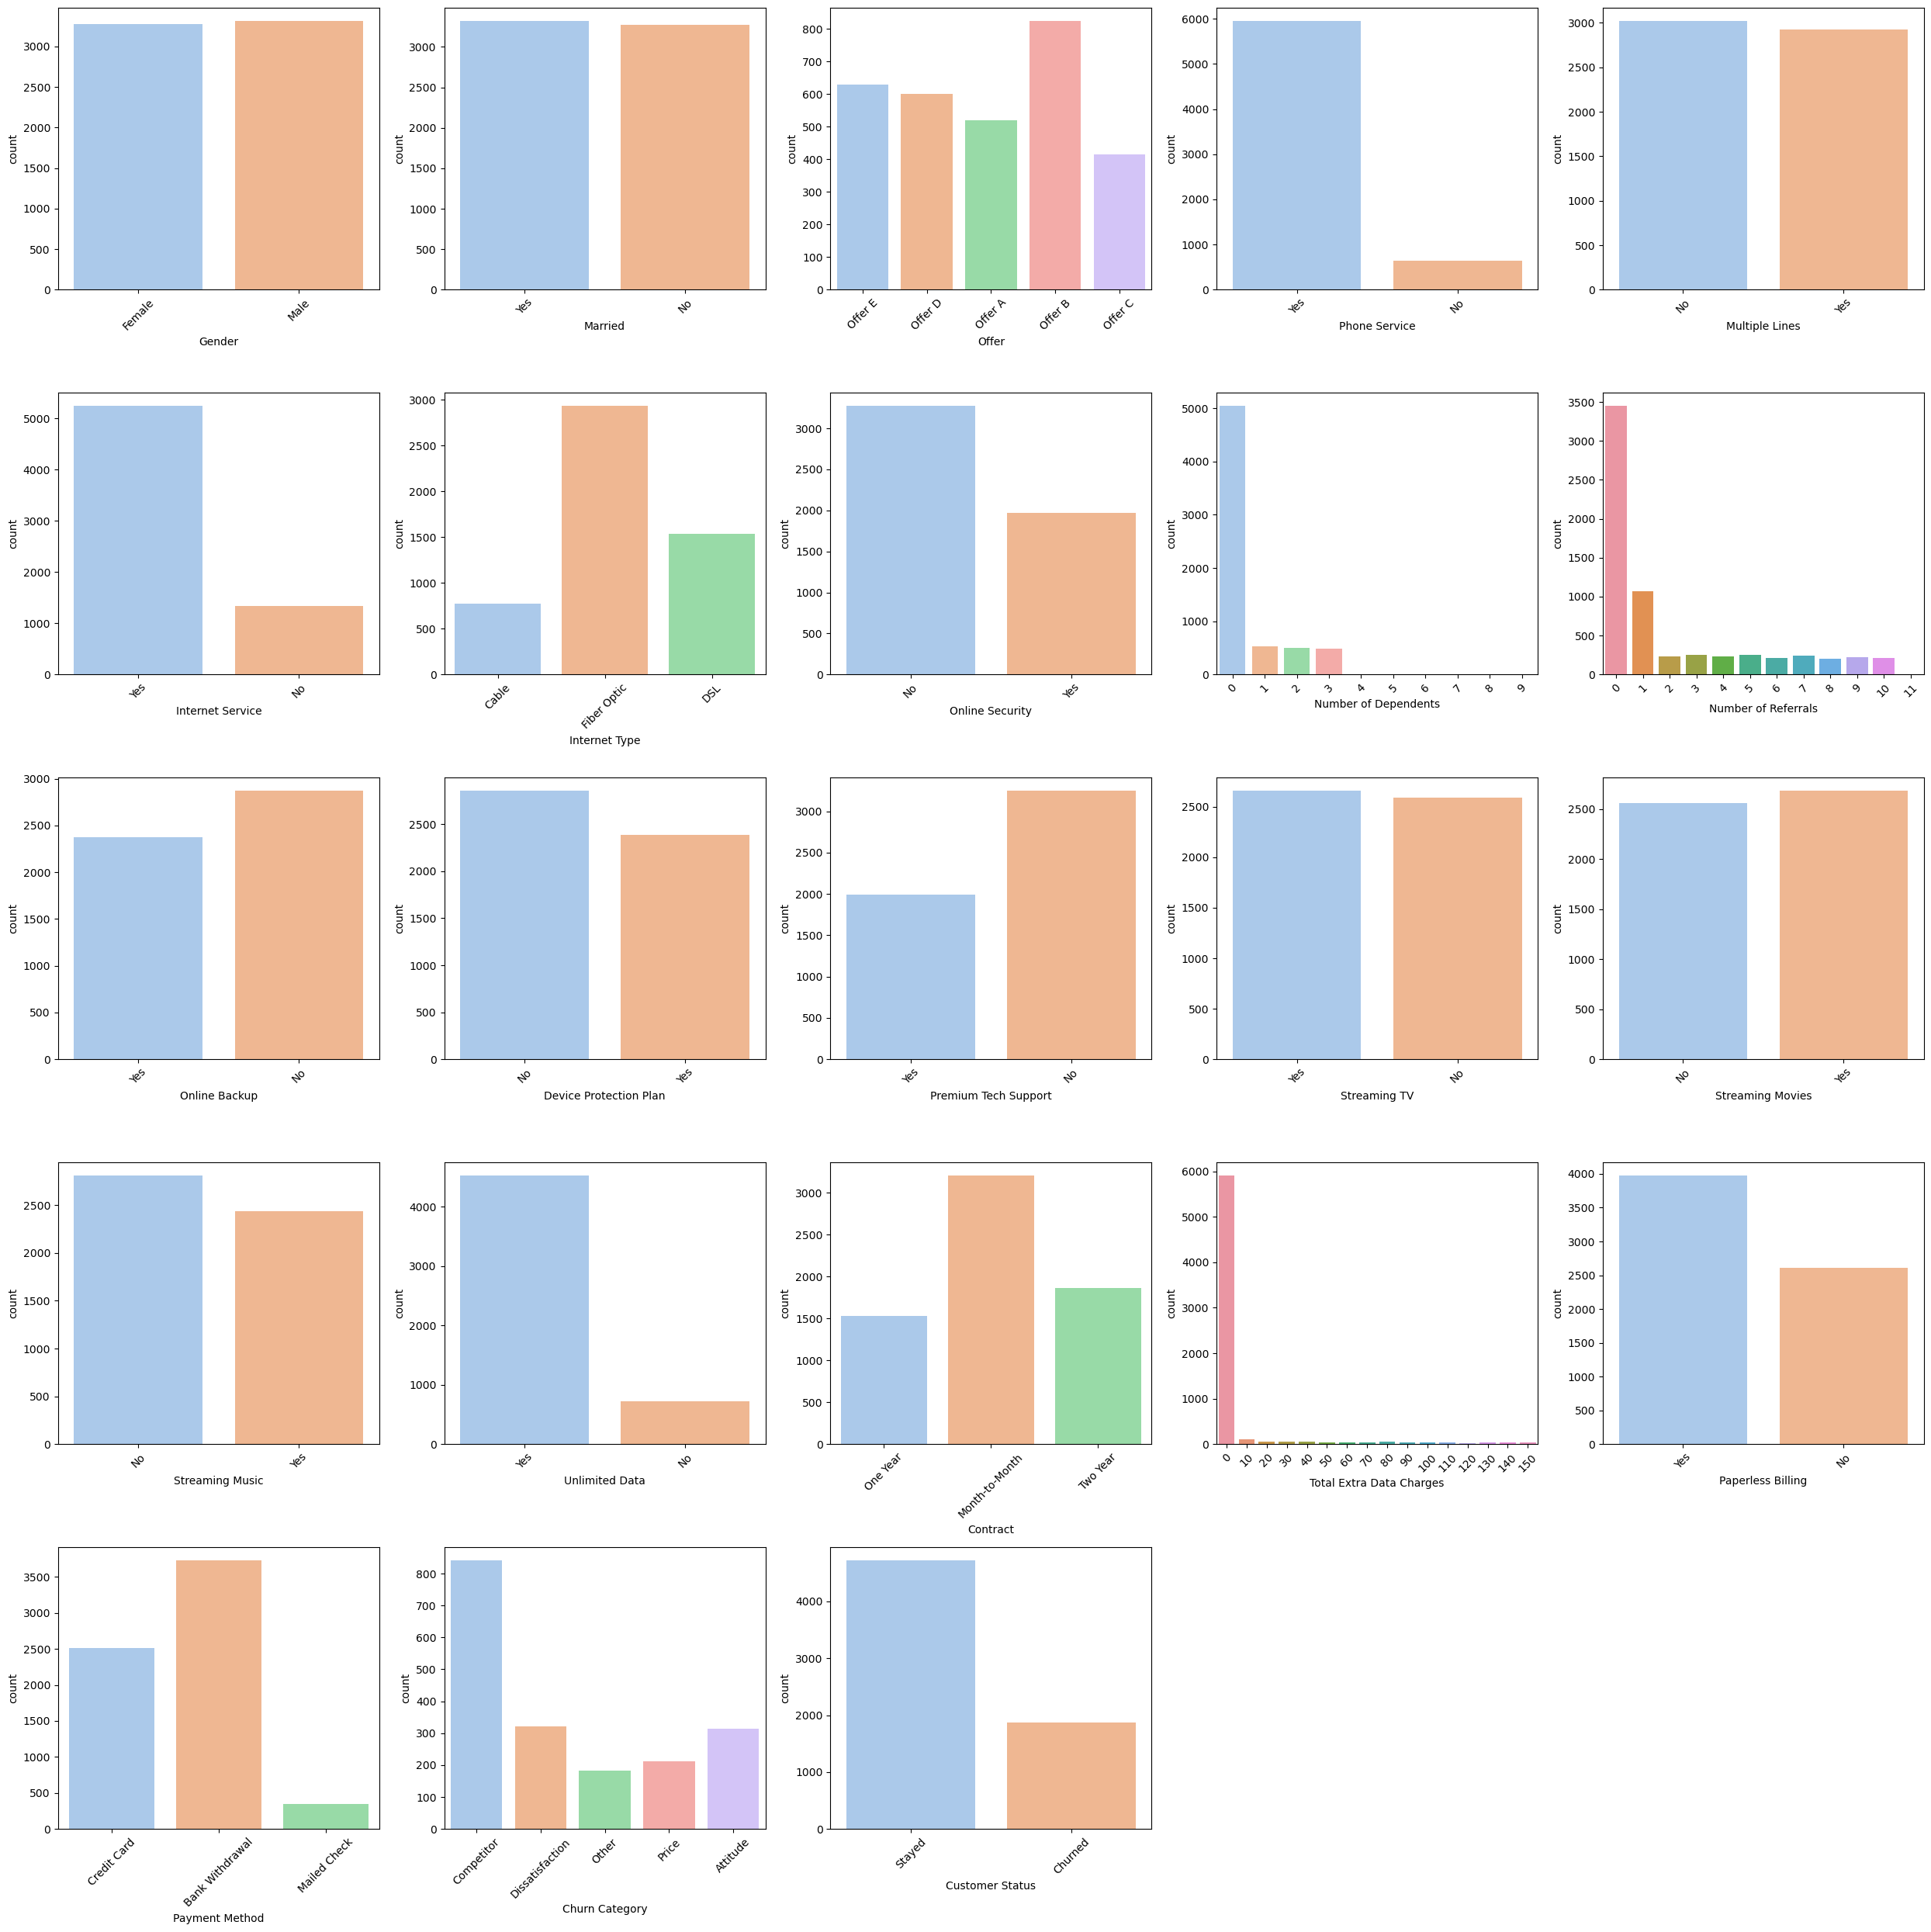

In [20]:
# Defining the number of rows and columns for the grid
num_cols = 5
num_rows = (len(Categorical.columns) - 2 + num_cols - 1) // num_cols  
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Setting color palette
color = sns.set_palette("pastel")
# Columns to iterate over excluding "city" and "churn reason"
columns_to_plot = [col for col in Categorical.columns if col not in ["City", "Churn Reason"]]
# Iterating over each column in the DataFrame
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the subplot axes
    sns.countplot(x=column, data=Categorical, ax=ax, palette= color)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Remove empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# Save image to include in PDF
plt.savefig('Distribution_of_Categorical_Feature.jpg')  
# Show the plot
plt.show()

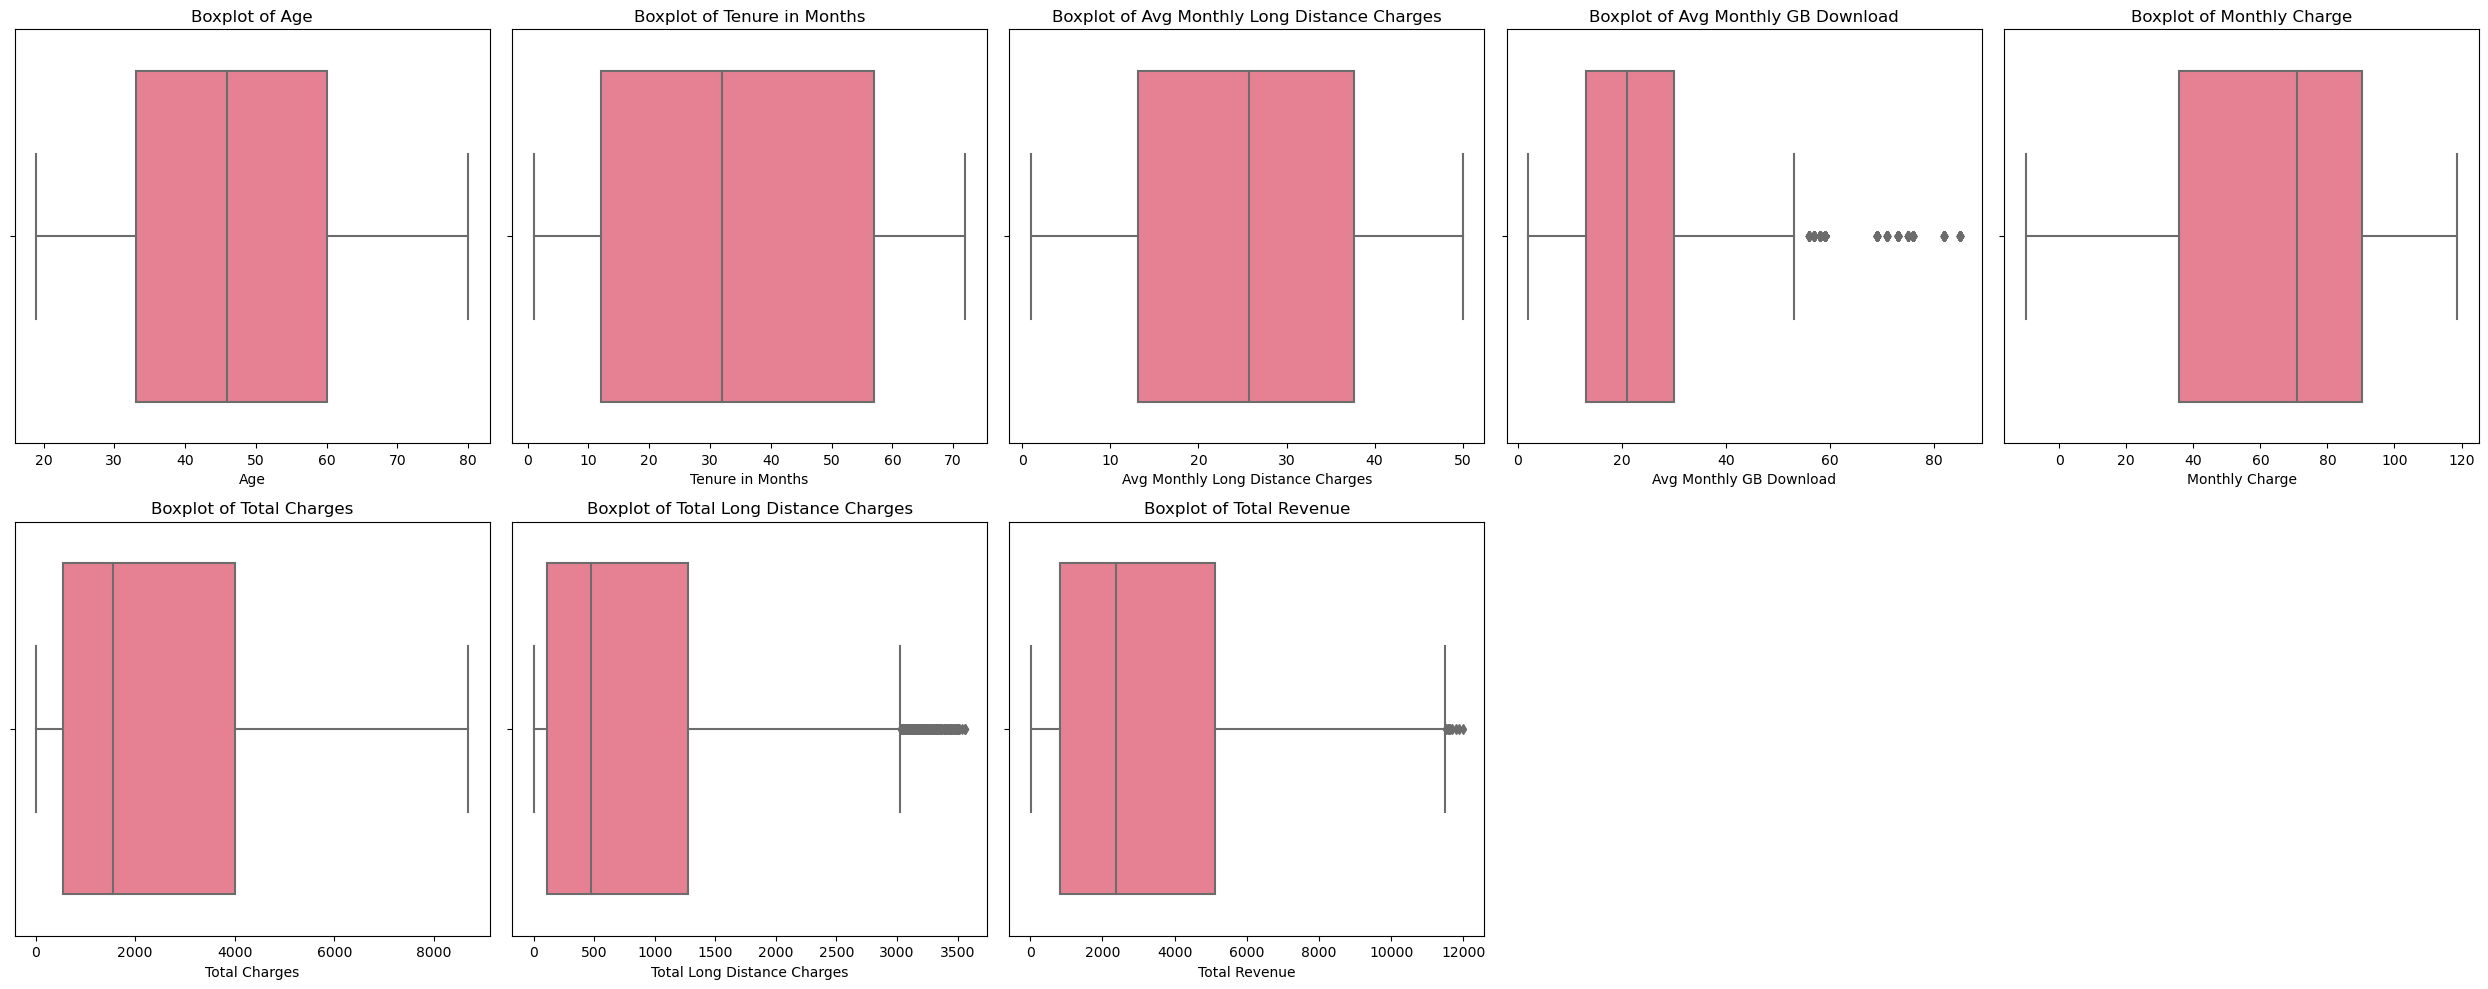

In [21]:
# Setting color palette
sns.set_palette("husl", 9)
# Defining the number of rows and columns for the grid
num_cols = 5
num_rows = (len(Numerical.columns) + num_cols - 1) // num_cols
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Columns to iterate over excluding "Total Refunds"
columns_to_plot = [col for col in Numerical.columns if col != "Total Refunds"]
# Iterating over each column in the DataFrame
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the subplot axes
    # Plot boxplot for numerical columns
    sns.boxplot(x=column, data=Numerical, ax=ax)
    ax.set_title(f"Boxplot of {column}")
# Remove empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# Save image to include in PDF
plt.savefig('Boxplot_of_each_Numerical_Feature.jpg')  
plt.show()

## Bi-Variate Analysis

## Visualising relationship between Categorical features and target variable

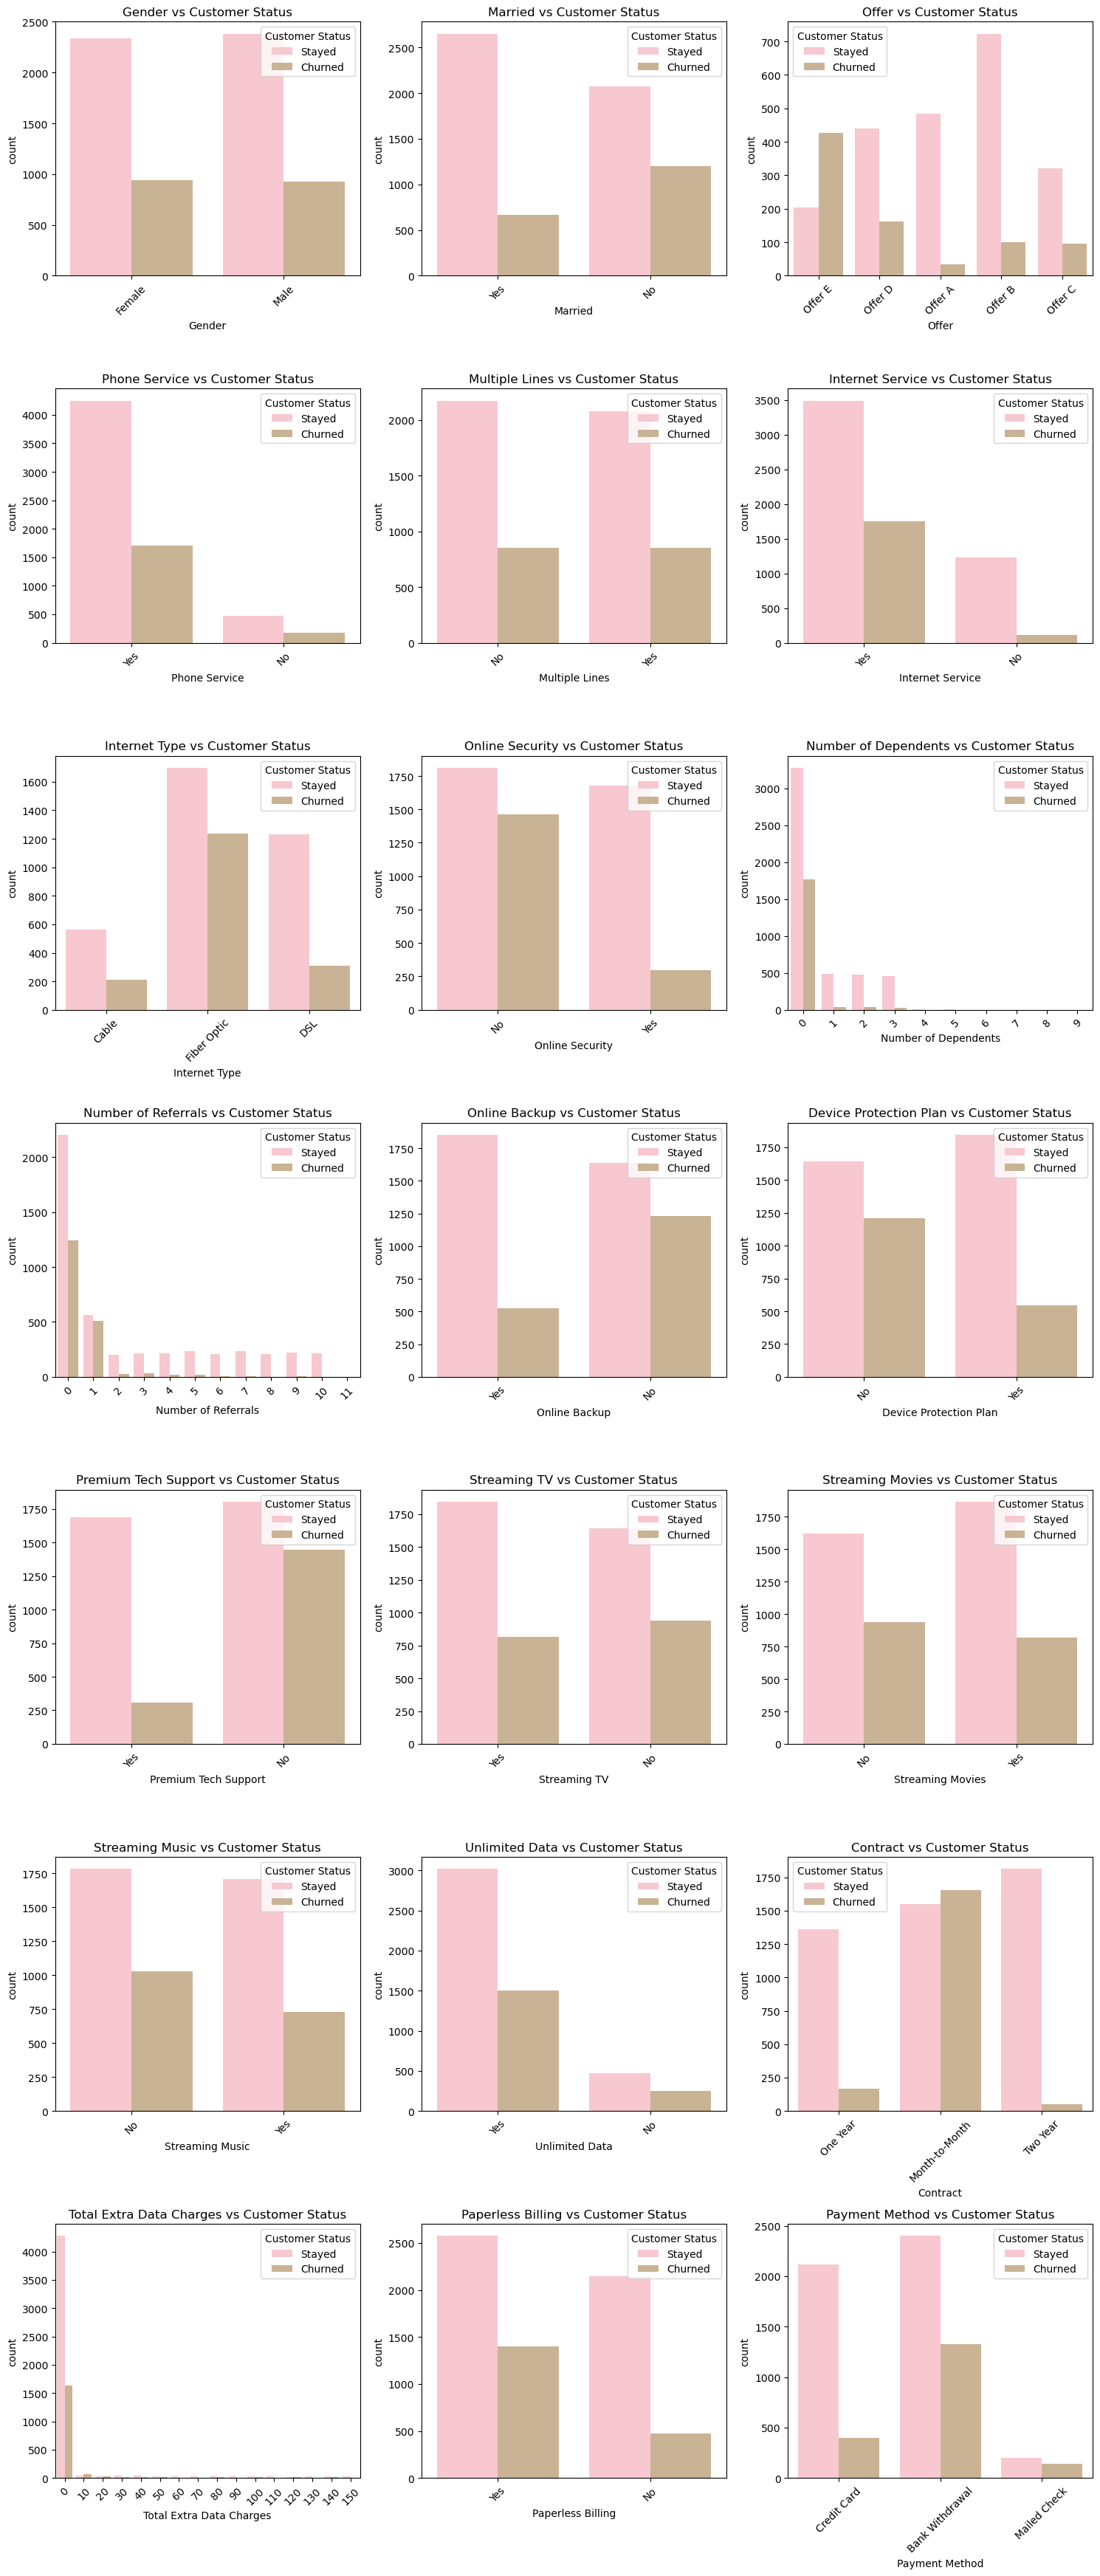

In [22]:
# Define the target variable
target_variable = 'Customer Status'
# Exclude columns from categorical_columns
columns_to_plot = [col for col in categorical_columns if col not in ['City', 'Churn Reason', 'Customer Status', 'Churn Category']]
# Calculate the number of columns for the subplot grid
num_cols = 3  # You may adjust this value as needed
# Calculate the actual number of rows needed
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols
# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Iterate over each categorical column
for i, column in enumerate(columns_to_plot):
    # Get the subplot axes
    ax = axes[i]    
    # Plot the relationship using a bar plot
    colour = ['pink','tan']
    sns.set_palette(colour)
    sns.countplot(x=column, hue=target_variable, data=Categorical, ax=ax)   
    # Set title
    ax.set_title(f'{column} vs {target_variable}')  
  # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
# Remove any remaining empty subplots
for j in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.savefig("Bivariate Analysis.jpg")
plt.show()

In [23]:
# Group by city and churn status
city_churn_counts = Churn.groupby(['City', 'Customer Status']).size().unstack().reset_index()
city_churn_counts.fillna(0, inplace=True)  # Fill NaN values with 0 for cities with no churn data

# Create a map centered around a latitude and longitude
churn_map = folium.Map(location=[Churn['Latitude'].mean(), Churn['Longitude'].mean()], zoom_start=5)

# Add markers for each city
for index, row in city_churn_counts.iterrows():
    City = row['City']
    Churned = row['Churned'] if 'Churned' in row else 0
    Stayed = row['Stayed'] if 'Stayed' in row else 0
    marker_popup = f"{City}<br>Churned: {Churned}<br>Stayed: {Stayed}"
    folium.Marker(
        location=[Churn[Churn['City'] == City]['Latitude'].values[0], Churn[Churn['City'] == City]['Longitude'].values[0]],
        popup=marker_popup,
        icon=folium.Icon(color='red' if Churned > Stayed else 'green')
    ).add_to(churn_map)

# Add a tooltip to show city name and churned/stayed count when hovering over a marker
folium.Marker(
    location=[0, 0],  # Dummy location
    icon=None,
    tooltip=folium.Tooltip("<b>Click a marker to see details</b>")
).add_to(churn_map)

# Display the map
churn_map

# Data Cleaning

## Removing Unnecessary Columns

In [24]:
#Removing unnecessary Columns
Churn.drop(["Customer ID", "Zip Code", "City", "Latitude", "Longitude", "Churn Reason", "Churn Category"], axis =1, inplace= True)

In [25]:
# Checking head of dataset after removing columns
Churn.head(n=30)

Gender  Age Married  Number of Dependents  Number of Referrals  \
0   Female   37     Yes                     0                    2   
1     Male   46      No                     0                    0   
2     Male   50      No                     0                    0   
3     Male   78     Yes                     0                    1   
4   Female   75     Yes                     0                    3   
5   Female   23      No                     3                    0   
6   Female   67     Yes                     0                    1   
7     Male   52     Yes                     0                    8   
8   Female   68      No                     0                    0   
9   Female   43     Yes                     1                    3   
10    Male   47      No                     0                    0   
11  Female   25     Yes                     2                    2   
12  Female   58     Yes                     0                    0   
13  Female   32      No                     0                    0   
14  Female   39      No                     0                    0   
15  Female   58     Yes                     2                    9   
16  Female   52     Yes                     1                    0   
18    Male   79      No                     0                    0   
19    Male   67      No                     0                    0   
20  Female   79     Yes                     0                    0   
21  Female   26     Yes                     0                    1   
22  Female   30     Yes                     2                    1   
24  Female   34     Yes                     0                    0   
25  Female   37     Yes                     1                    1   
26  Female   37     Yes                     3                   10   
27    Male   42     Yes                     3                    3   
28    Male   64      No                     0                    0   
29  Female   47     Yes                     3                    5   
30    Male   23     Yes                     3                    1   
31  Female   48     Yes                     0                    5   

    Tenure in Months    Offer Phone Service  \
0                  9      NaN           Yes   
1                  9      NaN           Yes   
2                  4  Offer E           Yes   
3                 13  Offer D           Yes   
4                  3      NaN           Yes   
5                  9  Offer E           Yes   
6                 71  Offer A           Yes   
7                 63  Offer B           Yes   
8                  7  Offer E           Yes   
9                 65      NaN           Yes   
10                54      NaN            No   
11                72      NaN           Yes   
12                 5      NaN           Yes   
13                72  Offer A           Yes   
14                56      NaN            No   
15                71  Offer A           Yes   
16                34      NaN            No   
18                45      NaN           Yes   
19                 1      NaN            No   
20                50      NaN           Yes   
21                13      NaN           Yes   
22                23  Offer D           Yes   
24                 4  Offer E           Yes   
25                 1      NaN            No   
26                55      NaN           Yes   
27                54      NaN           Yes   
28                26  Offer C           Yes   
29                69      NaN           Yes   
30                37  Offer C           Yes   
31                49  Offer B           Yes   

    Avg Monthly Long Distance Charges Multiple Lines  ...        Contract  \
0                               42.39             No  ...        One Year   
1                               10.69            Yes  ...  Month-to-Month   
2                               33.65             No  ...  Month-to-Month   
3                               27.82             No  ...  Month-to

## Checking for Null in Columns and replacing with median and mode

In [26]:
#Checking number of null in each column
Churn.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3598
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                    

In [27]:
# Calculate total number of rows
total_rows = Churn.shape[0]
# Calculate number of missing values in each column
missing_values = Churn.isnull().sum()
# Calculate percentage of missing values in each column
percentage_missing = (missing_values / total_rows) * 100
# Display the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(percentage_missing)

Percentage of missing values in each column:
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                54.606162
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.773866
Multiple Lines                        9.773866
Internet Service                      0.000000
Internet Type                        20.397632
Avg Monthly GB Download              20.397632
Online Security                      20.397632
Online Backup                        20.397632
Device Protection Plan               20.397632
Premium Tech Support                 20.397632
Streaming TV                         20.397632
Streaming Movies                     20.397632
Streaming Music                      20.397632
Unlimited Data 

In [28]:
#Removing unnecessary Columns
Churn.drop(["Offer"], axis =1, inplace= True)

In [29]:
# Replacing missing values in numerical columns with the median
numerical_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in numerical_columns:
    median_value = Churn[column].median()
    Churn[column].fillna(median_value, inplace=True)

In [30]:
# Replacing missing values in categorical columns with the mode
categorical_columns = ['Internet Type', 'Online Security', 'Multiple Lines', 'Internet Type', 'Online Security',
                       'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Streaming Music', 'Unlimited Data']  
for column in categorical_columns:
    mode_value = Churn[column].mode()[0]
    Churn[column].fillna(mode_value, inplace=True)


In [31]:
#Checking number of null in each column after replacing missing values
Churn.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

In [32]:
Churn.duplicated().sum()

0

In [33]:
# Checking head of dataset after replacing NaN Values
Churn.head(n=30)

Gender  Age Married  Number of Dependents  Number of Referrals  \
0   Female   37     Yes                     0                    2   
1     Male   46      No                     0                    0   
2     Male   50      No                     0                    0   
3     Male   78     Yes                     0                    1   
4   Female   75     Yes                     0                    3   
5   Female   23      No                     3                    0   
6   Female   67     Yes                     0                    1   
7     Male   52     Yes                     0                    8   
8   Female   68      No                     0                    0   
9   Female   43     Yes                     1                    3   
10    Male   47      No                     0                    0   
11  Female   25     Yes                     2                    2   
12  Female   58     Yes                     0                    0   
13  Female   32      No                     0                    0   
14  Female   39      No                     0                    0   
15  Female   58     Yes                     2                    9   
16  Female   52     Yes                     1                    0   
18    Male   79      No                     0                    0   
19    Male   67      No                     0                    0   
20  Female   79     Yes                     0                    0   
21  Female   26     Yes                     0                    1   
22  Female   30     Yes                     2                    1   
24  Female   34     Yes                     0                    0   
25  Female   37     Yes                     1                    1   
26  Female   37     Yes                     3                   10   
27    Male   42     Yes                     3                    3   
28    Male   64      No                     0                    0   
29  Female   47     Yes                     3                    5   
30    Male   23     Yes                     3                    1   
31  Female   48     Yes                     0                    5   

    Tenure in Months Phone Service  Avg Monthly Long Distance Charges  \
0                  9           Yes                              42.39   
1                  9           Yes                              10.69   
2                  4           Yes                              33.65   
3                 13           Yes                              27.82   
4                  3           Yes                               7.38   
5                  9           Yes                              16.77   
6                 71           Yes                               9.96   
7                 63           Yes                              12.96   
8                  7           Yes                              10.53   
9                 65           Yes                              28.46   
10                54            No                              25.72   
11                72           Yes                              16.01   
12                 5           Yes                              18.65   
13                72           Yes                               2.25   
14                56            No                              25.72   
15                71           Yes                              27.26   
16                34            No                              25.72   
18                45           Yes                              10.67   
19                 1            No                              25.72   
20                50           Yes                              31.43   
21                13           Yes                              43.56   
22                23           Yes                              34.91   
24                 4           Yes                              12.43   
25                 1            No                              25.72   
26      

## Encoding Categorical Features

In [34]:
# Checking data types before encoding
Churn.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Me

In [35]:
# Convert categorical columns (with 2 unique values) to numerical
# List of categorical columns excluding specified columns
categorical_columns = [col for col in Churn.select_dtypes(include=['object']).columns 
                       if col not in ['Internet Type', 'Contract', 'Payment Method']]
# Convert categorical columns to numerical using Label Encoding
for column in categorical_columns:
    le = LabelEncoder()
    Churn[column] = le.fit_transform(Churn[column])

In [36]:
# Checking head of dataset after Encoding features with 2 unique values
Churn.head()

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   

   Multiple Lines  Internet Service  ...        Contract  Paperless Billing  \
0               0                 1  ...        One Year                  1   
1               1                 1  ...  Month-to-Month                  0   
2               0                 1  ...  Month-to-Month                  1   
3               0                 1  ...  Month-to-Month                  1   
4               0                 1  ...  Month-to-Month                  1   

    Payment Method  Monthly Charge  Total Charges  Total Refunds  \
0      Credit Card            65.6         593.30           0.00   
1      Credit Card            -4.0         542.40          38.33   
2  Bank Withdrawal            73.9         280.85           0.00   
3  Bank Withdrawal            98.0        1237.85           0.00   
4      Credit Card            83.9         267.40           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                         0                       381.51         974.81   
1                        10                        96.21         610.28   
2                         0                       134.60         415.45   
3                         0                       361.66        1599.51   
4                         0                        22.14         289.54   

   Customer Status  
0                1  
1                1  
2                0  
3                0  
4                0  

[5 rows x 30 columns]

In [37]:
# Extract the columns you want to encode
columns_to_encode = ['Internet Type', 'Contract', 'Payment Method']
# Apply One-Hot Encoding
encoded_columns = pd.get_dummies(Churn[columns_to_encode])
# Drop the original categorical columns from the DataFrame
Churn = Churn.drop(columns_to_encode, axis=1)
# Concatenate the encoded columns with the original DataFrame
Churn = pd.concat([Churn, encoded_columns], axis=1)

In [38]:
# Checking head of dataset after Encoding
Churn.head(n=10)

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   
5       0   23        0                     3                    0   
6       0   67        1                     0                    1   
7       1   52        1                     0                    8   
8       0   68        0                     0                    0   
9       0   43        1                     1                    3   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   
5                 9              1                              16.77   
6                71              1                               9.96   
7                63              1                              12.96   
8                 7              1                              10.53   
9                65              1                              28.46   

   Multiple Lines  Internet Service  ...  Customer Status  \
0               0                 1  ...                1   
1               1                 1  ...                1   
2               0                 1  ...                0   
3               0                 1  ...                0   
4               0                 1  ...                0   
5               0                 1  ...                1   
6               0                 1  ...                1   
7               1                 1  ...                1   
8               0                 1  ...                1   
9               1                 1  ...                1   

   Internet Type_Cable  Internet Type_DSL  Internet Type_Fiber Optic  \
0                 True              False                      False   
1                 True              False                      False   
2                False              False                       True   
3                False              False                       True   
4                False              False                       True   
5                 True              False                      False   
6                False              False                       True   
7                False              False                       True   
8                False               True                      False   
9                 True              False                      False   

   Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
0                    False               True              False   
1                     True              False              False   
2                     True              False              False   
3                     True              False              False   
4                     True              False              False   
5                     True              False              False   
6                    False              False               True   
7                    False              False               True   
8                    False              False               True   
9                    False              False               True   

   Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
0                           False                        True   
1                           False                        True   
2                  

In [39]:
# Checking data types after encoding
Churn.dtypes

Gender                                 int32
Age                                    int64
Married                                int32
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int32
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int32
Internet Service                       int32
Avg Monthly GB Download              float64
Online Security                        int32
Online Backup                          int32
Device Protection Plan                 int32
Premium Tech Support                   int32
Streaming TV                           int32
Streaming Movies                       int32
Streaming Music                        int32
Unlimited Data                         int32
Paperless Billing                      int32
Monthly Charge                       float64
Total Charges                        float64
Total Refu

In [40]:
# Select boolean columns
boolean_columns = Churn.select_dtypes(include='bool').columns
# Convert boolean columns to integers (0 and 1)
Churn[boolean_columns] = Churn[boolean_columns].astype(int)

In [41]:
# Checking head of dataset after Encoding
Churn.head(n=10)

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   
5       0   23        0                     3                    0   
6       0   67        1                     0                    1   
7       1   52        1                     0                    8   
8       0   68        0                     0                    0   
9       0   43        1                     1                    3   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   
5                 9              1                              16.77   
6                71              1                               9.96   
7                63              1                              12.96   
8                 7              1                              10.53   
9                65              1                              28.46   

   Multiple Lines  Internet Service  ...  Customer Status  \
0               0                 1  ...                1   
1               1                 1  ...                1   
2               0                 1  ...                0   
3               0                 1  ...                0   
4               0                 1  ...                0   
5               0                 1  ...                1   
6               0                 1  ...                1   
7               1                 1  ...                1   
8               0                 1  ...                1   
9               1                 1  ...                1   

   Internet Type_Cable  Internet Type_DSL  Internet Type_Fiber Optic  \
0                    1                  0                          0   
1                    1                  0                          0   
2                    0                  0                          1   
3                    0                  0                          1   
4                    0                  0                          1   
5                    1                  0                          0   
6                    0                  0                          1   
7                    0                  0                          1   
8                    0                  1                          0   
9                    1                  0                          0   

   Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   
5                        1                  0                  0   
6                        0                  0                  1   
7                        0                  0                  1   
8                        0                  0                  1   
9                        0                  0                  1   

   Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
0                               0                           1   
1                               0                           1   
2                  

# Normlisation

In [42]:
# Select the features to be normalized
features_to_normalize = ['Avg Monthly Long Distance Charges', 'Tenure in Months', 'Age', 'Number of Referrals', 'Number of Dependents']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected features
Churn[features_to_normalize] = scaler.fit_transform(Churn[features_to_normalize])

In [43]:
# Checking head of dataset after normalisation
Churn.head(n=10)

Gender       Age  Married  Number of Dependents  Number of Referrals  \
0       0  0.295082        1              0.000000             0.181818   
1       1  0.442623        0              0.000000             0.000000   
2       1  0.508197        0              0.000000             0.000000   
3       1  0.967213        1              0.000000             0.090909   
4       0  0.918033        1              0.000000             0.272727   
5       0  0.065574        0              0.333333             0.000000   
6       0  0.786885        1              0.000000             0.090909   
7       1  0.540984        1              0.000000             0.727273   
8       0  0.803279        0              0.000000             0.000000   
9       0  0.393443        1              0.111111             0.272727   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0          0.112676              1                           0.844835   
1          0.112676              1                           0.197632   
2          0.042254              1                           0.666394   
3          0.169014              1                           0.547366   
4          0.028169              1                           0.130053   
5          0.112676              1                           0.321764   
6          0.985915              1                           0.182728   
7          0.873239              1                           0.243977   
8          0.084507              1                           0.194365   
9          0.901408              1                           0.560433   

   Multiple Lines  Internet Service  ...  Customer Status  \
0               0                 1  ...                1   
1               1                 1  ...                1   
2               0                 1  ...                0   
3               0                 1  ...                0   
4               0                 1  ...                0   
5               0                 1  ...                1   
6               0                 1  ...                1   
7               1                 1  ...                1   
8               0                 1  ...                1   
9               1                 1  ...                1   

   Internet Type_Cable  Internet Type_DSL  Internet Type_Fiber Optic  \
0                    1                  0                          0   
1                    1                  0                          0   
2                    0                  0                          1   
3                    0                  0                          1   
4                    0                  0                          1   
5                    1                  0                          0   
6                    0                  0                          1   
7                    0                  0                          1   
8                    0                  1                          0   
9                    1                  0                          0   

   Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   
5                        1                  0                  0   
6                        0                  0                  1   
7                        0                  0                  1   
8                        0                  0                  1   
9                        0                  0                  1   

   Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
0                               0                           1   
1                            

# Correlation Analysis for Multi-Collinearity Assessment

In [44]:
# Correlation Analysis
# Selecting only numerical features (excluding the target variable)
numerical_features = Churn.select_dtypes(include='number').drop(columns=['Customer Status'])
# Compute correlation matrix
correlation_matrix = numerical_features.corr()
# Display correlation matrix
print(correlation_matrix)

                                     Gender       Age   Married  \
Gender                             1.000000  0.007664  0.004971   
Age                                0.007664  1.000000 -0.014409   
Married                            0.004971 -0.014409  1.000000   
Number of Dependents               0.006321 -0.125500  0.322628   
Number of Referrals               -0.004353 -0.032019  0.663598   
Tenure in Months                   0.011547 -0.009574  0.359737   
Phone Service                     -0.010518  0.007853  0.023813   
Avg Monthly Long Distance Charges  0.015720 -0.015403 -0.004581   
Multiple Lines                    -0.004748  0.098179  0.123751   
Internet Service                  -0.002584  0.110758 -0.021248   
Avg Monthly GB Download           -0.014879 -0.505260  0.066664   
Online Security                   -0.017059 -0.046073  0.132193   
Online Backup                     -0.009362  0.028884  0.125829   
Device Protection Plan            -0.001482  0.020439  0.13604

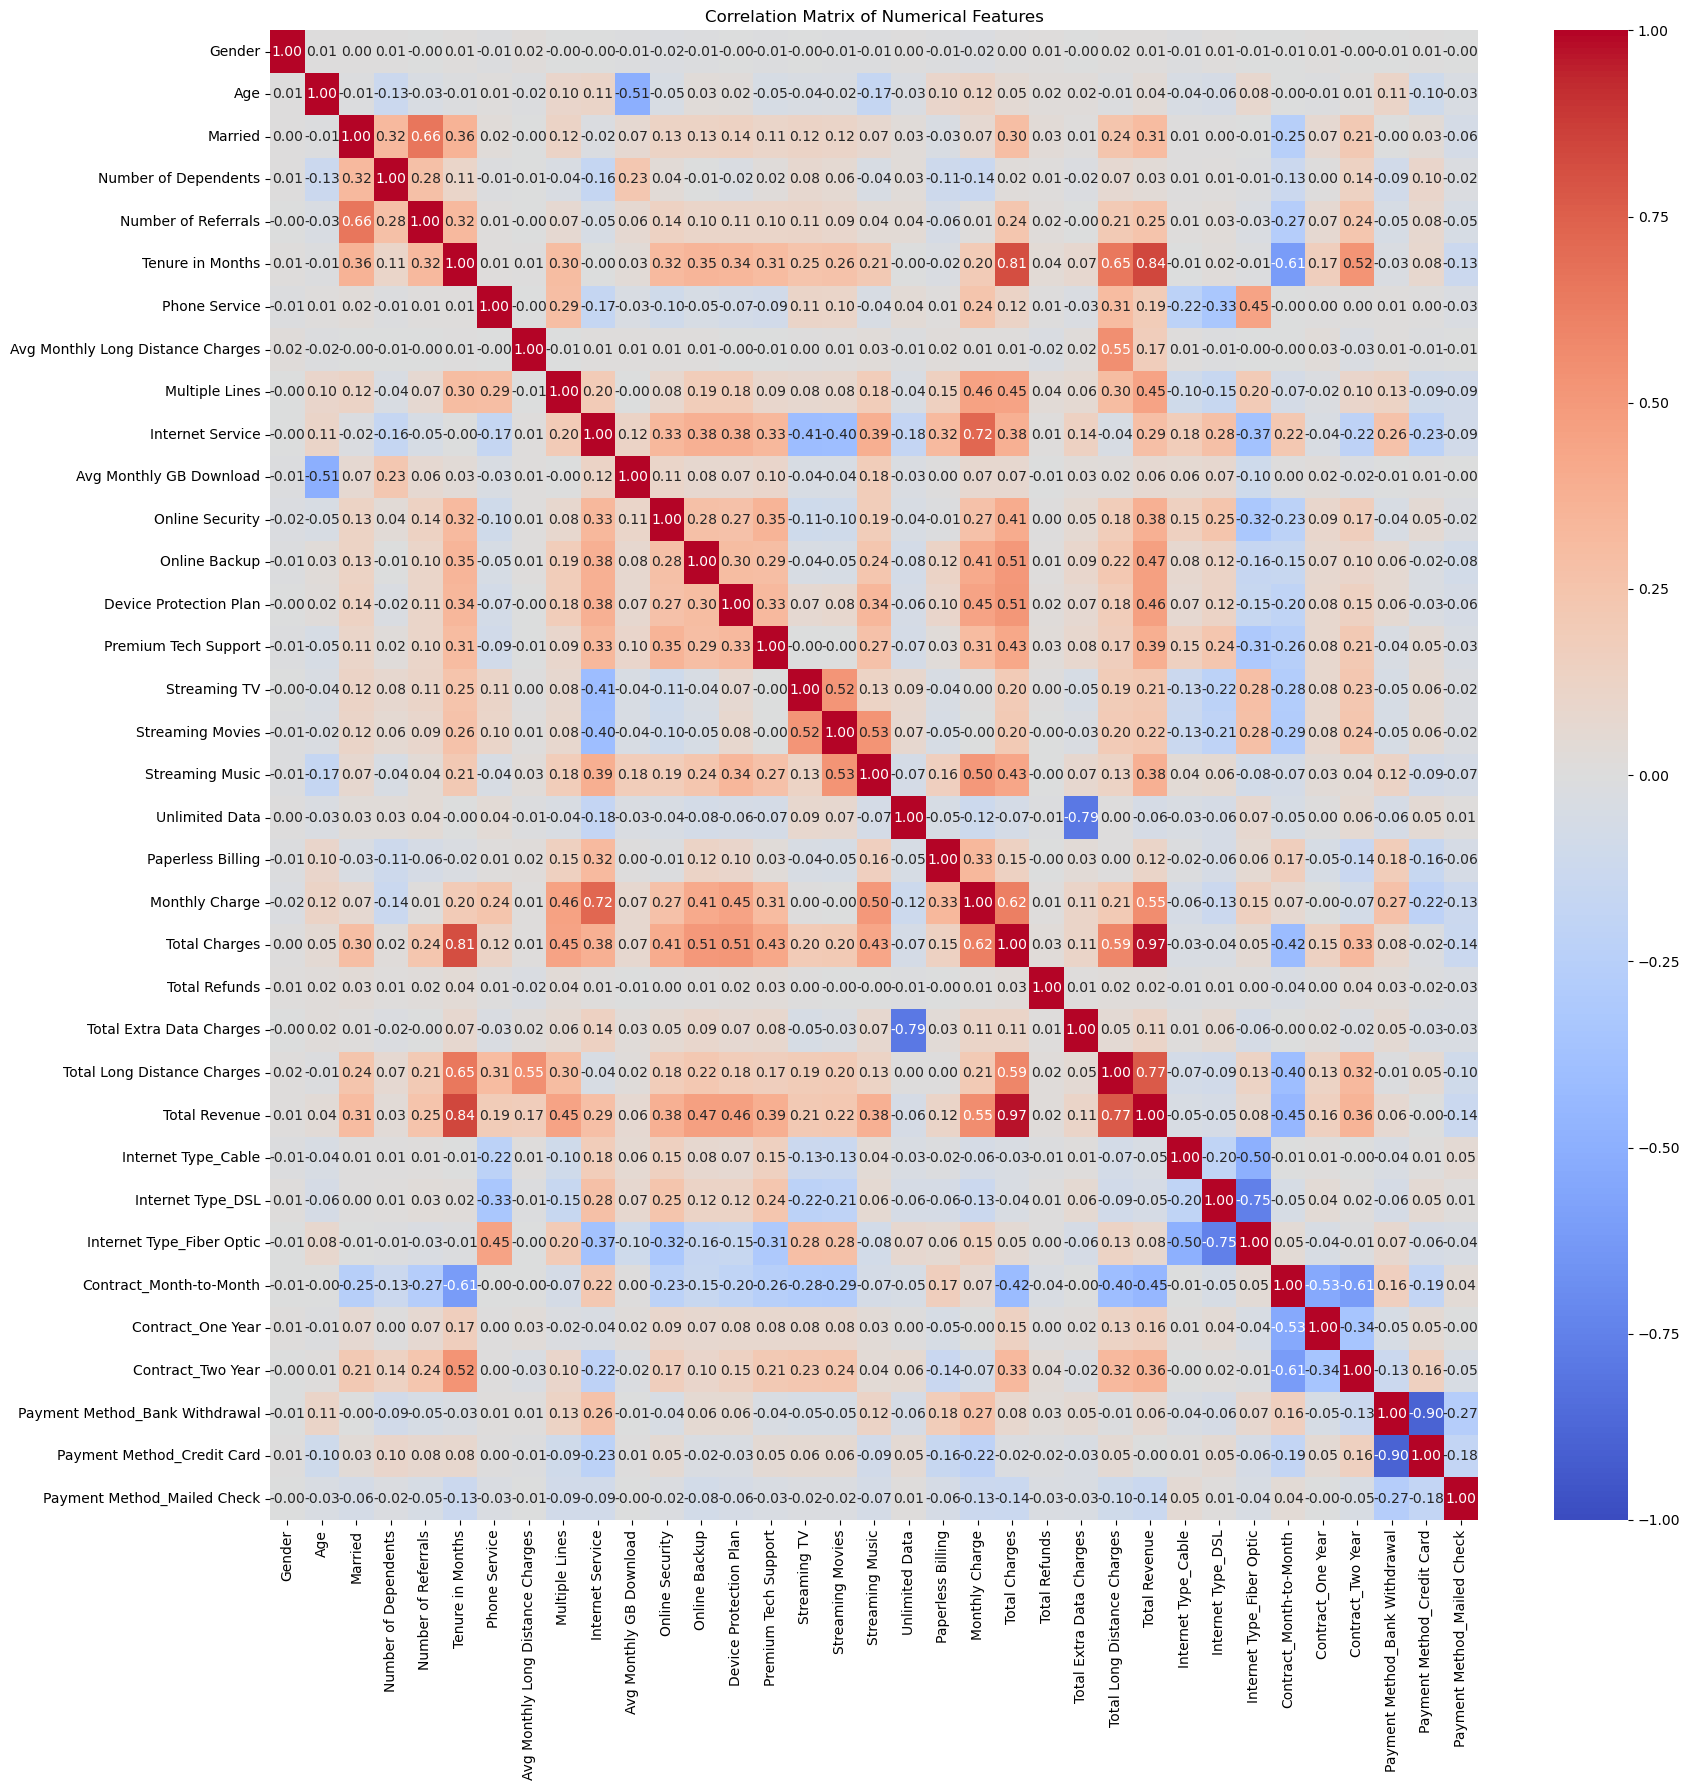

In [45]:
# Correlation Plot
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Add title and adjust layout
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
# Show plot
plt.savefig('Correlation Matrix of Numerical Features.jpg')
plt.show()

In [46]:
# Checking for highly Correlated Features
# Setting a threshold for high correlation
threshold = 0.7
# Initializing a list to store highly correlated features pairs
highly_correlated_pairs = []
# Iterating through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Store the names of highly correlated features
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)
if not highly_correlated_pairs:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    for pair in highly_correlated_pairs:
        print(pair)

Highly correlated feature pairs:
('Tenure in Months', 'Total Charges')
('Tenure in Months', 'Total Revenue')
('Internet Service', 'Monthly Charge')
('Unlimited Data', 'Total Extra Data Charges')
('Total Charges', 'Total Revenue')
('Total Long Distance Charges', 'Total Revenue')
('Internet Type_DSL', 'Internet Type_Fiber Optic')
('Payment Method_Bank Withdrawal', 'Payment Method_Credit Card')


In [47]:
# Removal of highly correlated features
Churn.drop(['Tenure in Months', 'Total Charges','Total Revenue', 'Internet Service', 'Monthly Charge','Unlimited Data', 
            'Total Extra Data Charges', 'Total Long Distance Charges', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card'], axis =1, inplace= True)

In [48]:
#Checking Columns in dataset after feature removals
print(Churn.columns)

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Paperless Billing',
       'Total Refunds', 'Customer Status', 'Internet Type_Cable',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Mailed Check'],
      dtype='object')


# Variance Inflation Factor (VIF) for Numerical Features

In [49]:
# Selecting only numerical columns
numerical_columns = Churn.select_dtypes(include=['int64', 'float64']).columns

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(Churn[numerical_columns].values, i) for i in range(len(numerical_columns))]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                             Feature       VIF
0                                Age  2.338980
1               Number of Dependents  1.413638
2                Number of Referrals  1.535375
3  Avg Monthly Long Distance Charges  3.295581
4            Avg Monthly GB Download  2.371388
5                      Total Refunds  1.062786


The Variance Inflation Factor showed that all the numerical features have a variance of less than 10, so none of them would be removed.

# Chi Square Test for Categorical Features

In [50]:
# Iterate over each feature (excluding the target variable) in the dataset
for feature in Churn.columns[:-1]:
    # Check if the feature is integer-encoded (assuming categorical)
    if Churn[feature].dtype == 'int32':
        # Create a contingency table for the feature and the target variable
        contingency_table = pd.crosstab(Churn[feature], Churn['Customer Status'])
        
        # Perform the chi-square test
        chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Print the results
        print(f"Chi-square test results for {feature}:")
        print(f"   Chi-square statistic: {chi2_statistic}")
        print(f"   P-value: {p_value}")
        
        # Check for significance (e.g., p-value < 0.05)
        if p_value < 0.05:
            print(f"   {feature} is statistically significant for predicting the target variable.")
        else:
            print(f"   {feature} is not statistically significant for predicting the target variable.")
        
        print()


Chi-square test results for Gender:
   Chi-square statistic: 0.24007105217966312
   P-value: 0.6241548018547587
   Gender is not statistically significant for predicting the target variable.

Chi-square test results for Married:
   Chi-square statistic: 220.5060439643492
   P-value: 7.014602453362894e-50
   Married is statistically significant for predicting the target variable.

Chi-square test results for Phone Service:
   Chi-square statistic: 1.2551734871989866
   P-value: 0.26256666476273127
   Phone Service is not statistically significant for predicting the target variable.

Chi-square test results for Multiple Lines:
   Chi-square statistic: 1.1535971852605198
   P-value: 0.2827973969037025
   Multiple Lines is not statistically significant for predicting the target variable.

Chi-square test results for Online Security:
   Chi-square statistic: 248.43749367640638
   P-value: 5.689634112881904e-56
   Online Security is statistically significant for predicting the target variabl

In [51]:
# Removal of non statistically significant features
Churn.drop(["Gender", "Phone Service", "Multiple Lines", "Internet Type_Cable"], axis =1, inplace= True)

In [52]:
# Checking Shape of dataset after removal of irrelevant features
Churn.shape

(6589, 20)

# Data Splitting for Machine Learning

### Seperating Features and Target Variables

In [53]:
#Splitting the dataset into features (X) and target variable (Y)
X = Churn.drop(columns=['Customer Status'], axis=1)
Y = Churn["Customer Status"]

In [54]:
# Shuffle your data
X,Y = shuffle(X, Y, random_state=42) 

In [55]:
X.head()

Age  Married  Number of Dependents  Number of Referrals  \
2059  0.606557        0              0.000000             0.000000   
4323  0.491803        1              0.000000             0.909091   
1544  0.163934        1              0.222222             0.909091   
2644  0.770492        1              0.000000             0.545455   
4029  0.655738        1              0.111111             1.000000   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
2059                           0.111474                     21.0   
4323                           0.903838                     21.0   
1544                           0.504492                     69.0   
2644                           0.634341                      8.0   
4029                           0.841364                     25.0   

      Online Security  Online Backup  Device Protection Plan  \
2059                0              0                       0   
4323                0              0                       0   
1544                1              1                       1   
2644                1              0                       0   
4029                1              0                       1   

      Premium Tech Support  Streaming TV  Streaming Movies  Streaming Music  \
2059                     0             0                 0                0   
4323                     0             1                 1                0   
1544                     1             0                 0                0   
2644                     0             1                 1                0   
4029                     1             0                 0                0   

      Paperless Billing  Total Refunds  Contract_Month-to-Month  \
2059                  1           0.00                        1   
4323                  1           0.00                        0   
1544                  0           0.00                        0   
2644                  1           0.00                        0   
4029                  1          25.49                        0   

      Contract_One Year  Contract_Two Year  Payment Method_Mailed Check  
2059                  0                  0                            0  
4323                  1                  0                            0  
1544                  0                  1                            0  
2644                  1                  0                            0  
4029                  1                  0                            0

In [56]:
Y.head()

2059    0
4323    1
1544    1
2644    1
4029    1
Name: Customer Status, dtype: int32

#  Backward Stepwise Regression

In [57]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.365385
         Iterations 8
                                  Results: Logit
Model:                    Logit                  Method:                 MLE      
Dependent Variable:       Customer Status        Pseudo R-squared:       0.387    
Date:                     2024-05-05 21:37       AIC:                    4853.0382
No. Observations:         6589                   BIC:                    4982.1082
Df Model:                 18                     Log-Likelihood:         -2407.5  
Df Residuals:             6570                   LL-Null:                -3929.5  
Converged:                1.0000                 LLR p-value:            0.0000   
No. Iterations:           8.0000                 Scale:                  1.0000   
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

In [58]:
#Removing features with P values higher than 0.05
# List of columns to drop
columns_to_drop = ['Avg Monthly Long Distance Charges','Avg Monthly GB Download', 'Device Protection Plan']
# Drop the specified columns from the DataFrame X
X = X.drop(columns_to_drop, axis=1)

In [59]:
logit_model=sm.Logit(Y,X)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.365699
         Iterations 8
                               Results: Logit
Model:                  Logit                Method:               MLE      
Dependent Variable:     Customer Status      Pseudo R-squared:     0.387    
Date:                   2024-05-05 21:37     AIC:                  4851.1792
No. Observations:       6589                 BIC:                  4959.8697
Df Model:               15                   Log-Likelihood:       -2409.6  
Df Residuals:           6573                 LL-Null:              -3929.5  
Converged:              1.0000               LLR p-value:          0.0000   
No. Iterations:         8.0000               Scale:                1.0000   
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Age  

### Data Splitting

In [60]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Checking the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (4612, 16)
Shape of X_test: (1977, 16)
Shape of Y_train: (4612,)
Shape of Y_test: (1977,)


# Target Variable Distribution & Upsampling

## Plotting Customer Status before upsampling

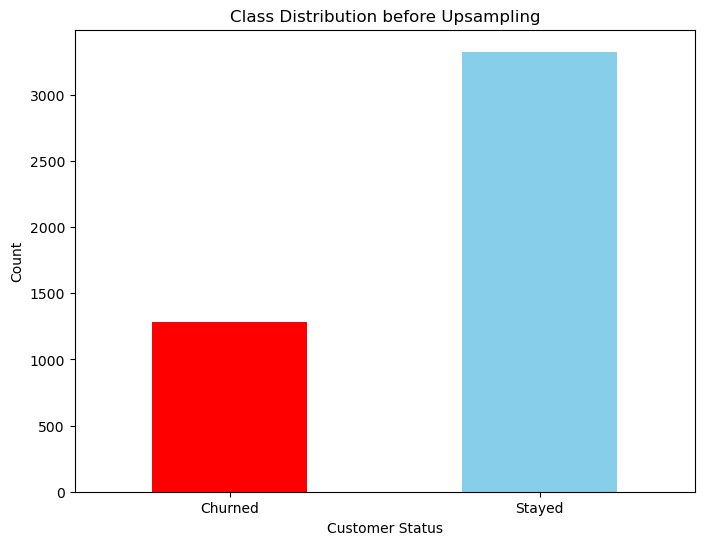

In [61]:
# Count the occurrences of each class
class_counts = Y_train.value_counts()

# Reorder the class counts so that Churned (0) is displayed before Stayed (1)
class_counts_reordered = class_counts.reindex([0, 1])

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts_reordered.plot(kind='bar', color=['red', 'skyblue',])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Class Distribution before Upsampling')
plt.xticks([0, 1], ['Churned', 'Stayed'], rotation=0)  # Set x-axis ticks to display class labels
plt.savefig("Target variable distribution.jpg")
plt.show()


##  Upsampling using SMOTE

In [62]:
# Initialize SMOTE with a desired sampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Upsample the minority class in the training data
X_train, Y_train = smote.fit_resample(X_train, Y_train)
X_test, Y_test = smote.fit_resample(X_test, Y_test)

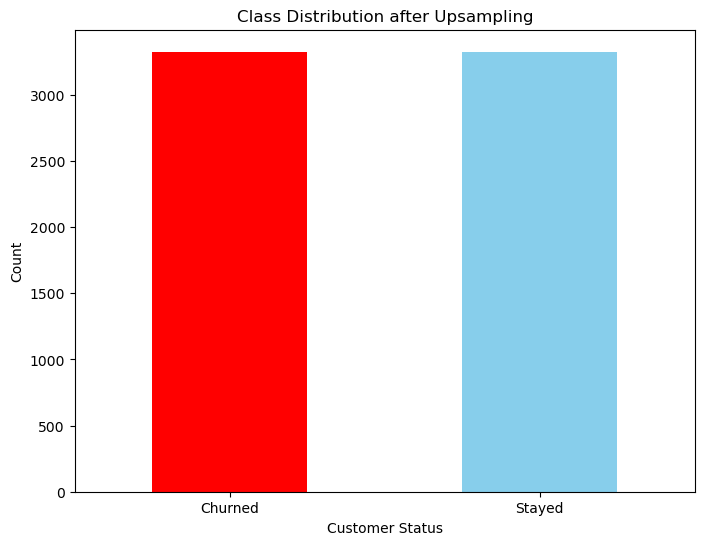

In [63]:
# Count the occurrences of each class
class_counts = Y_train.value_counts()
# Reorder the class counts so that Churned (0) is displayed before Stayed (1)
class_counts_reordered = class_counts.reindex([0, 1])
# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts_reordered.plot(kind='bar', color=['red', 'skyblue',])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Class Distribution after Upsampling')
plt.xticks([0, 1], ['Churned', 'Stayed'], rotation=0) 
plt.savefig("Distribution after SMOTE.jpg")
plt.show()

In [64]:
Y_train.value_counts()

Customer Status
1    3327
0    3327
Name: count, dtype: int64

In [65]:
Y_test.value_counts()

Customer Status
0    1393
1    1393
Name: count, dtype: int64

# Machine Learning Algorithms

## Logistic Regression

In [66]:
# Train a Logistic Regression Model (using the default parameters)
log_model = LogisticRegression(random_state=16, max_iter=1000)
# fit the model with data
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [67]:
y_pred_log = log_model.predict(X_test)

In [68]:
#printing accuracy
accuracy_log = accuracy_score(Y_test, y_pred_log)
precision_log = precision_score(Y_test, y_pred_log)
recall_log = recall_score(Y_test, y_pred_log)
f1_log = f1_score(Y_test, y_pred_log)
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)
# Print classification report
print("Logistic Regression Classification Report before optimisation:")
print(classification_report(Y_test, y_pred_log))

Accuracy: 0.8201722900215362
Precision: 0.8534072900158478
Recall: 0.7731514716439339
F1 Score: 0.8112994350282486
Logistic Regression Classification Report before optimisation:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1393
           1       0.85      0.77      0.81      1393

    accuracy                           0.82      2786
   macro avg       0.82      0.82      0.82      2786
weighted avg       0.82      0.82      0.82      2786



### Optimisation of Logistic Regression Model

In [69]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear', 'saga']        
}

In [70]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Creating a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=16)
# The GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
# Performing grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=16),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [71]:
# Printing the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [72]:
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

In [73]:
# Calculate accuracy
accuracy_logreg = accuracy_score(Y_test, y_pred_best)
precision_logreg = precision_score(Y_test, y_pred_best)
recall_logreg = recall_score(Y_test, y_pred_best)
f1_logreg = f1_score(Y_test, y_pred_best)
print("Accuracy of best model:", accuracy_logreg)
print("Precision of best model:", precision_logreg)
print("Recall of best model:", recall_logreg)
print("F1 of best model:", f1_logreg)
# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, y_pred_best))

Accuracy of best model: 0.8230437903804738
Precision of best model: 0.8543307086614174
Recall of best model: 0.7788944723618091
F1 of best model: 0.8148704468644387
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1393
           1       0.85      0.78      0.81      1393

    accuracy                           0.82      2786
   macro avg       0.83      0.82      0.82      2786
weighted avg       0.83      0.82      0.82      2786



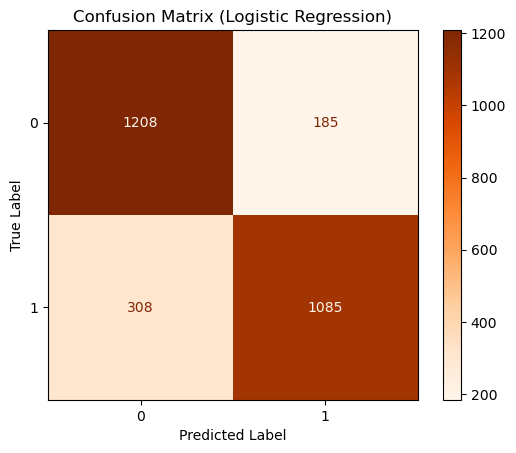

In [74]:
# Plot the confusion matrix for the Logistic Regression Model
cm_log = confusion_matrix(Y_test, y_pred_best)
disp_log = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log);
disp_log.plot(cmap='Oranges')  
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix for Logistic Regression.jpg')
plt.show()

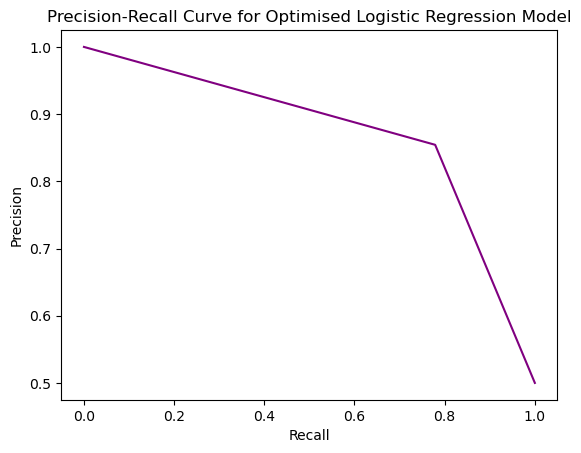

In [75]:
# Calculate Precision and Recall for the optimized model
precision_best, recall_best, thresholds_best = precision_recall_curve(Y_test, y_pred_best)
# Create Precision-Recall Curve
fig, ax = plt.subplots()
ax.plot(recall_best, precision_best, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for Optimised Logistic Regression Model')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
# Save the plot as an image file and display
plt.savefig('Precision-Recall Curve for Optimised Logistic Regression Model.jpg')
plt.show()

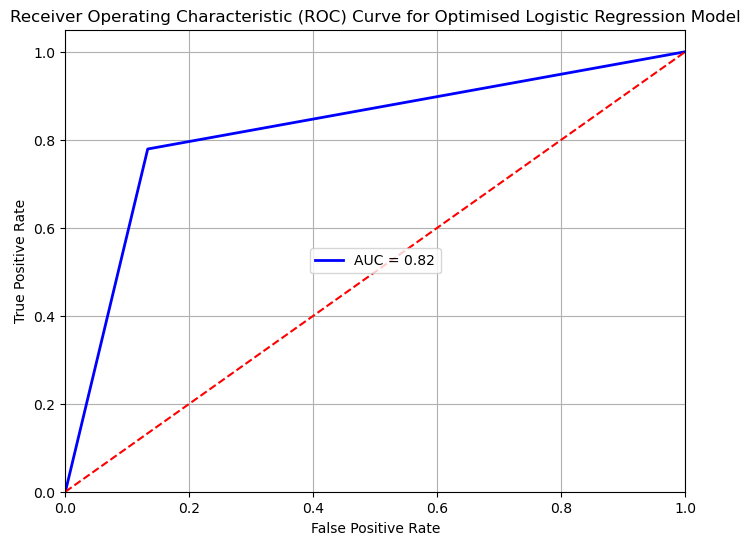

In [76]:
# Calculate False Positive Rate, True Positive Rate, and Thresholds for the optimized model
fpr_best, tpr_best, thresholds_best = roc_curve(Y_test, y_pred_best)
# Calculate the AUC score for the optimized model
auc_score_best = roc_auc_score(Y_test, y_pred_best)
# Plot ROC curve for the optimized model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'AUC = {auc_score_best:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimised Logistic Regression Model')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for Optimised Logistic Regression Model.jpg')
plt.show()

## Random Forest Classifier

In [77]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [78]:
y_pred_rf = rf_model.predict(X_test)

In [79]:
#printing accuracy
accuracy = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", accuracy)
# Print classification report
print("Random Forest Classification Report before optimisation:")
print(classification_report(Y_test, y_pred_rf))

Accuracy: 0.7954055994256999
Random Forest Classification Report before optimisation:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1393
           1       0.76      0.85      0.81      1393

    accuracy                           0.80      2786
   macro avg       0.80      0.80      0.79      2786
weighted avg       0.80      0.80      0.79      2786



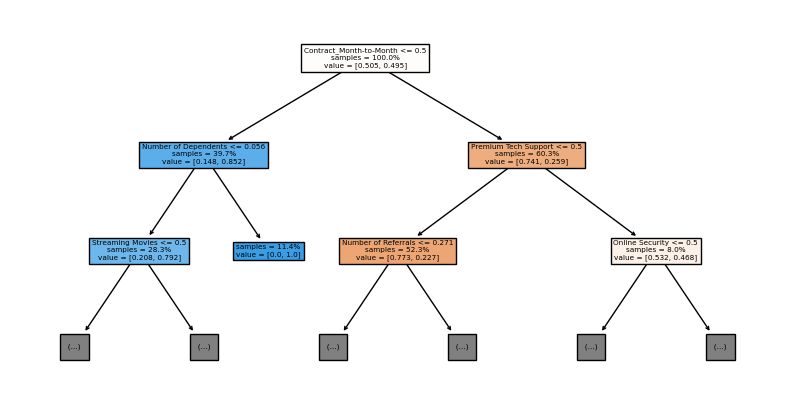

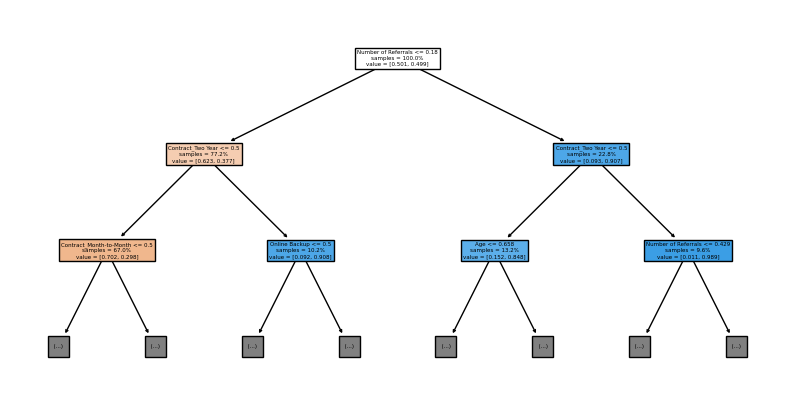

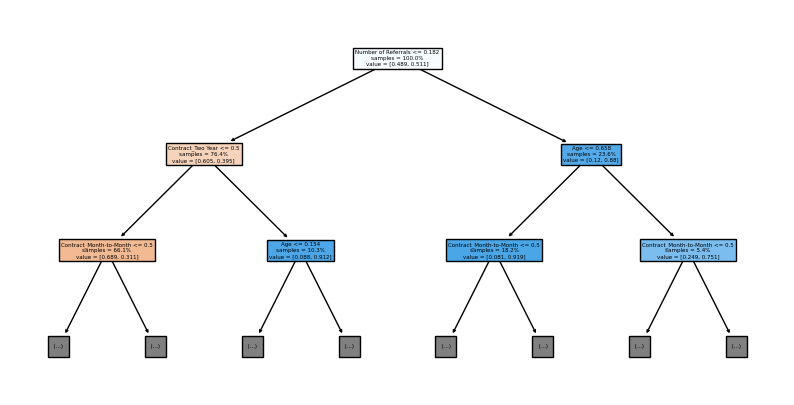

In [80]:
# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)

from sklearn.tree import plot_tree

# Export the first three decision trees from the forest
for i in range(3):
    plt.figure(figsize=(10, 5))
    tree = rf_model.estimators_[i]
    plot_tree(tree,
              feature_names=X_train_df.columns, 
              filled=True,
              max_depth=2,
              impurity=False,
              proportion=True)
    plt.show()

### Optimising the Random Forest Model

In [81]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# The grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [82]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [83]:
# Generate predictions with the best model
y_pred_best_rf = best_estimator.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_best_rf)
precision_rf = precision_score(Y_test, y_pred_best_rf)
recall_rf = recall_score(Y_test, y_pred_best_rf)
f1_rf = f1_score(Y_test, y_pred_best_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test, y_pred_best_rf))

Accuracy: 0.8277099784637473
Precision: 0.8217054263565892
Recall: 0.8370423546302943
F1 Score: 0.829302987197724
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1393
           1       0.82      0.84      0.83      1393

    accuracy                           0.83      2786
   macro avg       0.83      0.83      0.83      2786
weighted avg       0.83      0.83      0.83      2786



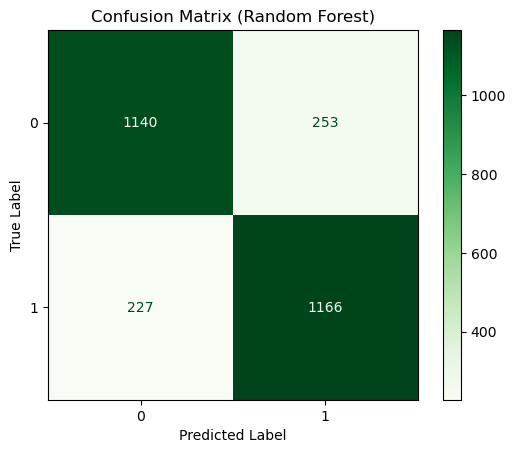

In [84]:
# Plot the confusion matrix for the Random Forest Model
cm = confusion_matrix(Y_test, y_pred_best_rf)
disp_rf = metrics.ConfusionMatrixDisplay(confusion_matrix=cm);
disp_rf.plot(cmap='Greens')  
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("Confusion Matrix for Random Forest")
plt.show()

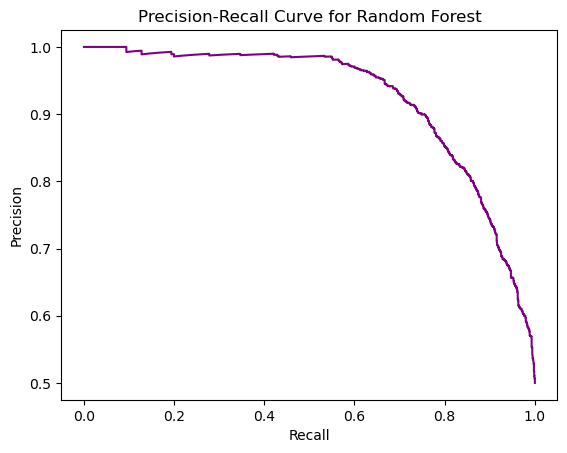

In [85]:
# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(Y_test, best_estimator.predict_proba(X_test)[:, 1])
# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.savefig('Precision-Recall Curve for Random Forest.jpg')
plt.show()

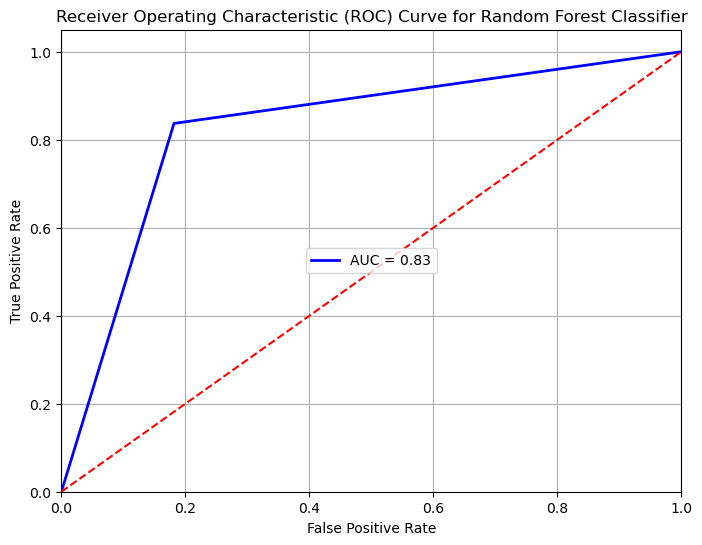

In [86]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_best_rf)
# Calculate the AUC score
auc_score = roc_auc_score(Y_test, y_pred_best_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier.jpg')
plt.show()

# K Nearest Neighbour

In [87]:
# Initializing the KNN classifier with a specified number of neighbors (e.g., 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [88]:
# Training the classifier on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
#Evaluating the performance of the model using the test set
knn_Y_predict = knn.predict(X_test)

In [90]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, knn_Y_predict))

Accuracy: 0.7613065326633166


In [91]:
# Print classification report
print("KNN Classification Report:")
print(classification_report(Y_test,knn_Y_predict))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1393
           1       0.75      0.78      0.77      1393

    accuracy                           0.76      2786
   macro avg       0.76      0.76      0.76      2786
weighted avg       0.76      0.76      0.76      2786



### Optimising the KNN Model

In [92]:
# Defining the range of values for n_neighbors
neighbors = np.arange(1, 36)

In [93]:
# Create an empty list to store the accuracy at different values of K
KNN_accuracy = []

In [94]:
# Loop through each value of n_neighbors and perform grid search
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    grid_search = GridSearchCV(knn, {'n_neighbors': [k]}, cv=5)
    grid_search.fit(X_train, Y_train)
    KNN_accuracy.append(grid_search.best_score_)

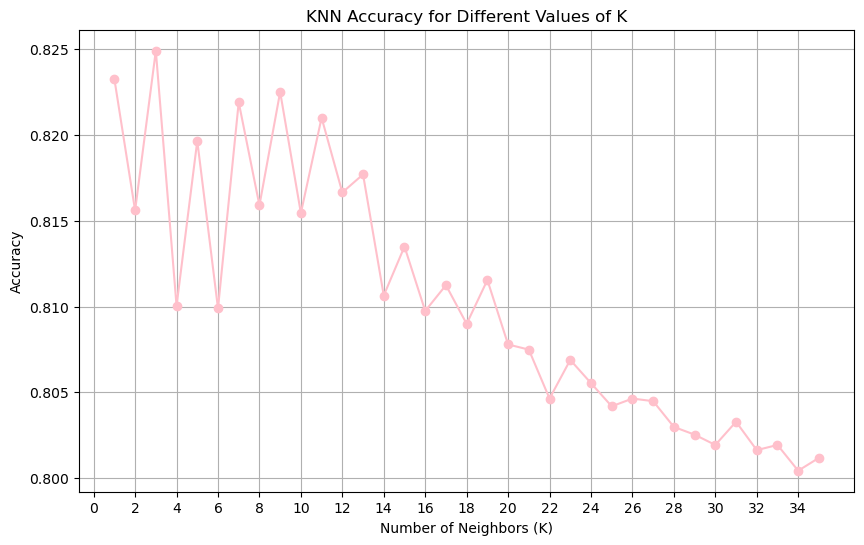

In [95]:
# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, KNN_accuracy, marker='o')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(0, 36, step=2))
plt.savefig('KNN Accuracy for Different Values of K.jpg')
plt.show()

In [96]:
best_index = np.argmax(KNN_accuracy)
best_k = neighbors[best_index]

print(f"The best value of n_neighbors (K) is: {best_k}")


The best value of n_neighbors (K) is: 3


In [97]:
knn= KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,Y_train)
best_k_predictions = knn.predict(X_test)

In [98]:
# Calculate precision and recall for the best K value
accuracy_knn = accuracy_score(Y_test, best_k_predictions)
precision_knn = precision_score(Y_test, best_k_predictions)
recall_knn = recall_score(Y_test, best_k_predictions)
f1_knn = f1_score(Y_test, best_k_predictions)
# Print the accuracy, precision, and recall for the best K value
print(f"Best K value: {best_k}")
print(f"Accuracy for best K value: {accuracy_knn}")
print(f"Precision for best K value: {precision_knn}")
print(f"Recall for best K value: {recall_knn}")
print(f"F1 Score for best K value: {f1_knn}")

# Print classification report
print("KNN Classification Report:")
print(classification_report(Y_test ,best_k_predictions))

Best K value: 3
Accuracy for best K value: 0.7613065326633166
Precision for best K value: 0.7506887052341598
Recall for best K value: 0.782483847810481
F1 Score for best K value: 0.7662565905096661
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1393
           1       0.75      0.78      0.77      1393

    accuracy                           0.76      2786
   macro avg       0.76      0.76      0.76      2786
weighted avg       0.76      0.76      0.76      2786



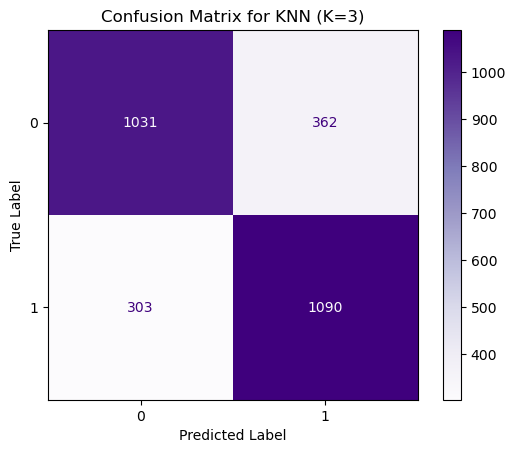

In [99]:
# Plot the confusion matrix for the KNN Model
cm_knn = confusion_matrix(Y_test, best_k_predictions)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn);
disp_knn.plot(cmap='Purples')  
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix for KNN.jpg')
plt.show()

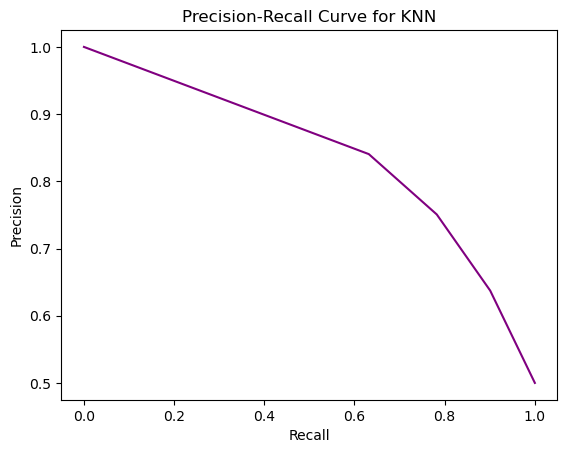

In [100]:
# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(Y_test, knn.predict_proba(X_test)[:, 1])
# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.savefig('Precision-Recall Curve for KNN.jpg')
plt.show()

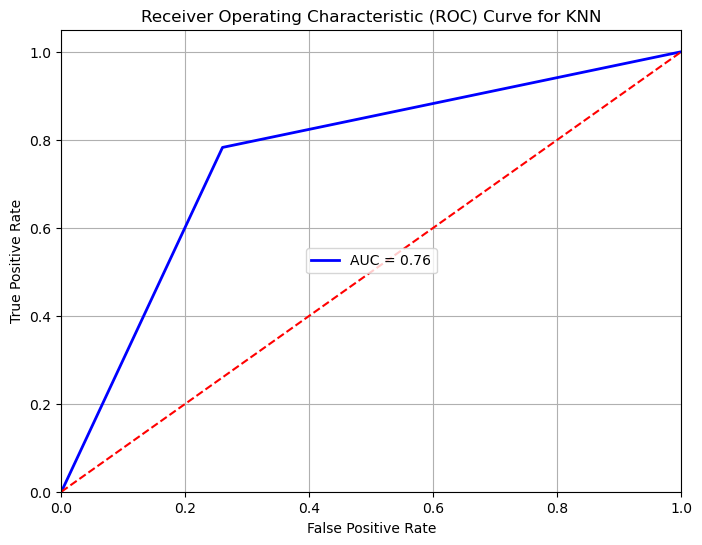

In [101]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, best_k_predictions)
# Calculate the AUC score
auc_score = roc_auc_score(Y_test, best_k_predictions)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for KNN.jpg')
plt.show()

## Guassian Naives Bayes (GNB) Model

In [102]:
# Initializing the GNB classifier
GNB = GaussianNB()

In [103]:
# Fitting the classifier to the training data
GNB.fit(X_train, Y_train)

GaussianNB()

In [104]:
# Predicting the target variable for the test data
gnb_Y_predict = GNB.predict(X_test)

In [105]:
# Calculate precision and recall for the GNB Model
accuracy_gnb = accuracy_score(Y_test, gnb_Y_predict)
precision_gnb = precision_score(Y_test, gnb_Y_predict)
recall_gnb= recall_score(Y_test, gnb_Y_predict)
f1_gnb= f1_score(Y_test, gnb_Y_predict)
# Print the accuracy, precision, and recall for GNB Model
print(f"Accuracy for GNB Model: {accuracy_gnb} ")
print(f"Precision for GNB Model: {precision_gnb}")
print(f"Recall for GNB Model: {recall_gnb}")
print(f"F1 Score for GNB Model: {f1_gnb}")

Accuracy for GNB Model: 0.7989949748743719 
Precision for GNB Model: 0.8078344419807835
Recall for GNB Model: 0.7846374730796841
F1 Score for GNB Model: 0.7960670065549891


In [106]:
# Print classification report
print("GNB Classification Report:")
print(classification_report(Y_test, gnb_Y_predict))

GNB Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1393
           1       0.81      0.78      0.80      1393

    accuracy                           0.80      2786
   macro avg       0.80      0.80      0.80      2786
weighted avg       0.80      0.80      0.80      2786



#### Optimising the GNB Model

In [107]:
# Define the parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Initialize GridSearchCV
grid_search = GridSearchCV(GNB, param_grid, cv=5, scoring='accuracy')

In [108]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
# Get the best parameters
best_params = grid_search.best_params_

In [109]:
# Initialize GNB with the best parameters
optimised_GNB = GaussianNB(var_smoothing=best_params['var_smoothing'])
# Fit the optimized model to the training data
optimised_GNB.fit(X_train, Y_train)
# Predict the target variable for the test data
optimised_gnb_Y_predict = optimised_GNB.predict(X_test)

In [110]:
# Calculate and print accuracy, precision, and recall for the optimized GNB model
accuracy_gnb = accuracy_score(Y_test, optimised_gnb_Y_predict)
precision_gnb = precision_score(Y_test, optimised_gnb_Y_predict)
recall_gnb = recall_score(Y_test, optimised_gnb_Y_predict)
f1_gnb = f1_score(Y_test, optimised_gnb_Y_predict)

print(f"Accuracy for Optimised GNB Model: {accuracy_gnb}")
print(f"Precision for Optimised GNB Model: {precision_gnb}")
print(f"Recall for Optimised GNB Model: {recall_gnb}")
print(f"F1 Score for Optimised GNB Model: {f1_gnb}")
# Print classification report
print("GNB Classification Report:")
print(classification_report(Y_test,  optimised_gnb_Y_predict))

Accuracy for Optimised GNB Model: 0.7982770997846375
Precision for Optimised GNB Model: 0.8070953436807096
Recall for Optimised GNB Model: 0.7839195979899497
F1 Score for Optimised GNB Model: 0.7953386744355426
GNB Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1393
           1       0.81      0.78      0.80      1393

    accuracy                           0.80      2786
   macro avg       0.80      0.80      0.80      2786
weighted avg       0.80      0.80      0.80      2786



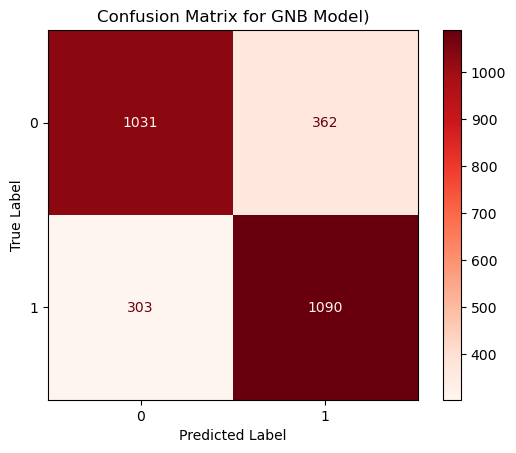

In [111]:
# Plot the confusion matrix for the GNB Model
cm_gnb = confusion_matrix(Y_test,  optimised_gnb_Y_predict)
disp_gnb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn);
disp_gnb.plot(cmap='Reds')  
plt.title(f'Confusion Matrix for GNB Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix for GNB.jpg')
plt.show()

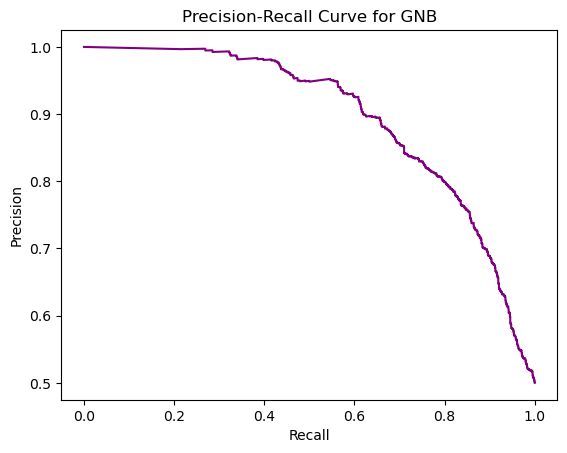

In [112]:
# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(Y_test, optimised_GNB.predict_proba(X_test)[:, 1])
# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve for GNB')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.savefig('Precision-Recall Curve for GNB.jpg')
plt.show()

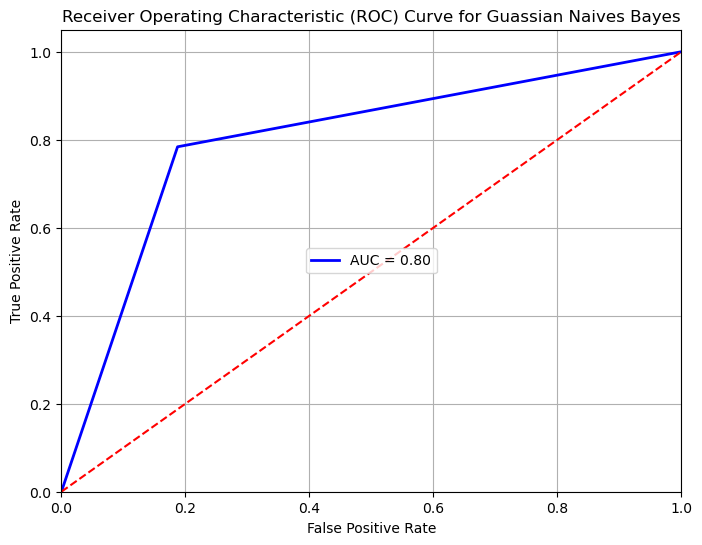

In [113]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, optimised_gnb_Y_predict)
# Calculate the AUC score
auc_score = roc_auc_score(Y_test, optimised_gnb_Y_predict)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Guassian Naives Bayes')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for GNB.jpg')
plt.show()

# Machine Learning Models Comparison

## Accuracy Comparison

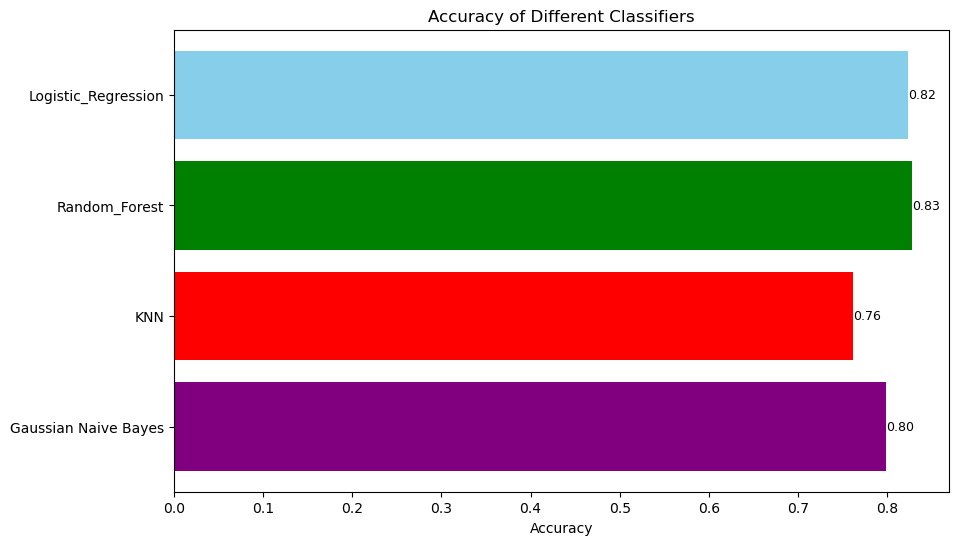

In [114]:
# Classifier names
classifiers = ['Logistic_Regression', 'Random_Forest', 'KNN', 'Gaussian Naive Bayes']
# Accuracy scores obtained from cross-validation or testing
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_knn, accuracy_gnb]
# Define colors for each classifier
colors = ['skyblue', 'green', 'red', 'purple']
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracy_scores, color=colors)
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.gca().invert_yaxis()  
# Add labels on bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             va='center', ha='left', fontsize=9)
plt.savefig('Model Comparision.jpg')
plt.show()

## Receiver Operating Characteristic (ROC) - Comparison of Models

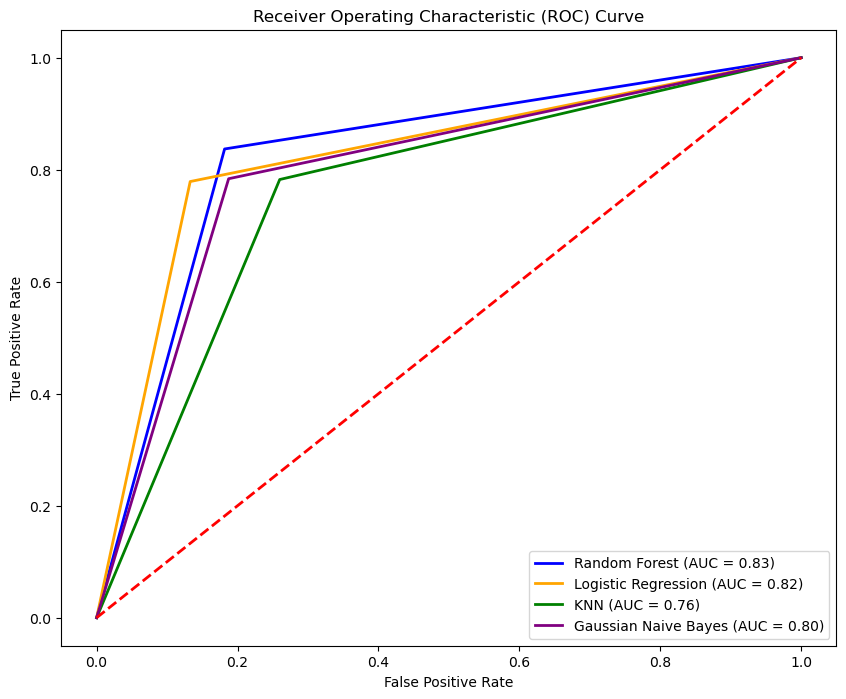

In [115]:
# Calculate ROC curves and AUC scores for each model
models = {
    'Random Forest': (y_pred_best_rf, 'blue'),
    'Logistic Regression': (y_pred_best, 'orange'),
    'KNN': (best_k_predictions, 'green'),
    'Gaussian Naive Bayes': (optimised_gnb_Y_predict, 'purple')
}
plt.figure(figsize=(10, 8))
# Plot ROC curves for each model
for model_name, (y_pred, color) in models.items():
    fpr, tpr, _ = roc_curve(Y_test, y_pred)
    auc_score = roc_auc_score(Y_test, y_pred)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})', color=color)
# Plot the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', lw=2)
# Add legend, labels, and title
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig('Combined_ROC_Curve.png')
plt.show()


## Precision-Recall & F1 Comparison

                 Model Accuracy % Precision % Recall % F1-Score
0  Logistic Regression     82.30%      85.43%   77.89%     0.81
1        Random Forest     82.77%      82.17%   83.70%     0.83
2                  KNN     76.13%      75.07%   78.25%     0.77
3          Naive Bayes     79.83%      80.71%   78.39%     0.80


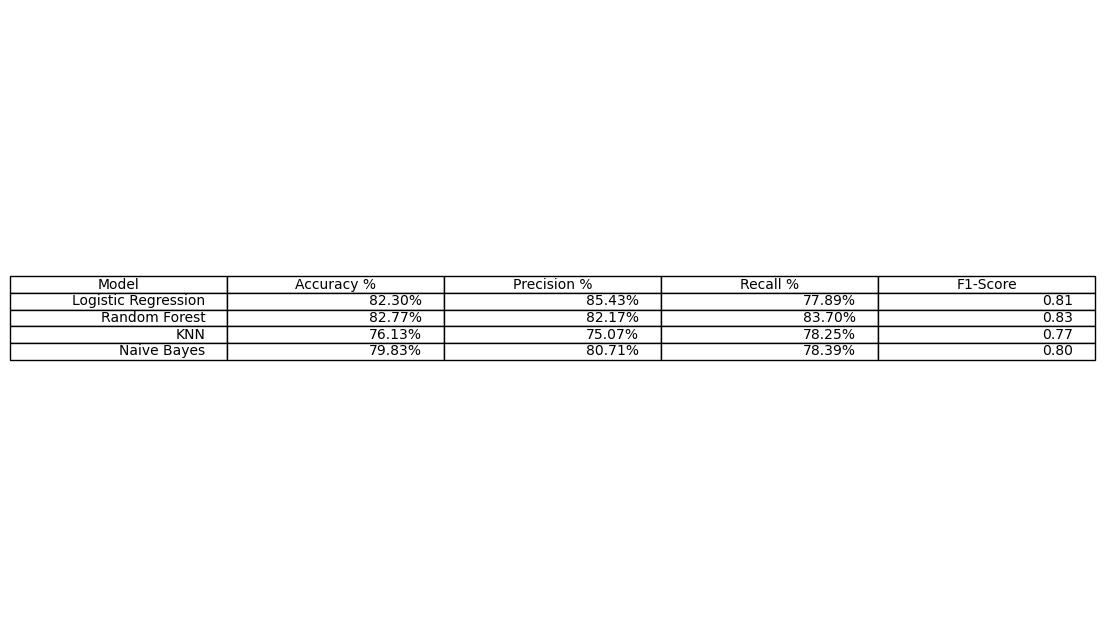

In [116]:
# Define the results dictionary
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes'],
    'Accuracy %': [accuracy_score(Y_test, y_pred_best), accuracy_score(Y_test, y_pred_best_rf), accuracy_score(Y_test, best_k_predictions), accuracy_score(Y_test, optimised_gnb_Y_predict)],
    'Precision %': [precision_score(Y_test, y_pred_best), precision_score(Y_test, y_pred_best_rf), precision_score(Y_test, best_k_predictions), precision_score(Y_test, optimised_gnb_Y_predict)],
    'Recall %': [recall_score(Y_test, y_pred_best), recall_score(Y_test, y_pred_best_rf), recall_score(Y_test, best_k_predictions), recall_score(Y_test, optimised_gnb_Y_predict)],
    'F1-Score': [f"{f1_score(Y_test, y_pred_best):.2f}", f"{f1_score(Y_test, y_pred_best_rf):.2f}", f"{f1_score(Y_test, best_k_predictions):.2f}", f"{f1_score(Y_test, optimised_gnb_Y_predict):.2f}"]
}
# Convert accuracy, precision, recall scores to percentages and F1 scores to strings with 2 decimal places
results['Accuracy %'] = [f"{score * 100:.2f}%" for score in results['Accuracy %']]
results['Precision %'] = [f"{score * 100:.2f}%" for score in results['Precision %']]
results['Recall %'] = [f"{score * 100:.2f}%" for score in results['Recall %']]
# Create a DataFrame
results_df = pd.DataFrame(results)
# Display the DataFrame
print(results_df)
# Plot the DataFrame as a table with increased font size
fig, ax = plt.subplots(figsize=(14, 8))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)  
# Save the table as an image
plt.savefig('performance_metrics_table.jpg')
plt.show()

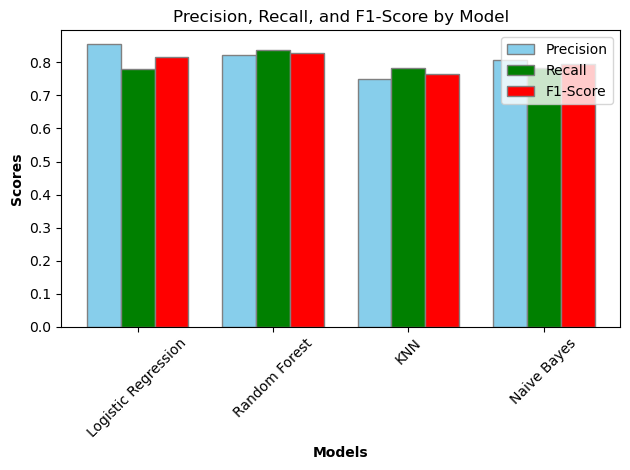

In [117]:
# Define data
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
y_true = [Y_test, Y_test, Y_test, Y_test]  # Replace with your true labels
y_pred = [y_pred_best, y_pred_best_rf, best_k_predictions, optimised_gnb_Y_predict]  # Replace with your predicted labels
# Calculate precision, recall, and F1-score
precision_scores = [precision_score(true, pred) for true, pred in zip(y_true, y_pred)]
recall_scores = [recall_score(true, pred) for true, pred in zip(y_true, y_pred)]
f1_scores = [f1_score(true, pred) for true, pred in zip(y_true, y_pred)]
# Set the width of the bars
bar_width = 0.25
# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# Plot grouped bar chart with custom colors
plt.bar(r1, precision_scores, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='red', width=bar_width, edgecolor='grey', label='F1-Score')
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)
# Add labels and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Precision, Recall, and F1-Score by Model')
# Add legend
plt.legend()
# Show plot
plt.tight_layout()
plt.savefig('PRF.jpg')
plt.show()